#  <div class=' alert alert-block alert-info'> Building a text generative model with Wine Reviews Dataset </div>

### ** This is the wineyard of Château Latour in France, which produces the most expensive wine in the dataset** 

<img src = 'http://winesinniagara.com/wp-content/uploads/2011/10/CIMG2010.jpg' width='600px'>

<font color='black' size = '4'>** Data Dictionary** <br></font>

**Context - Wine Reviews Dataset from Kaggle, not the same as the wine dataset used in class which contains wine properties data **
<br><br><font color = 'blue'>
</font>
<font color='black' size = '4'>**Content**</font>
<br><br><font color = 'blue'>
The data consists of 10 fields:
<br><br>1. Points: the number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)
<br><br>2. Variety: the type of grapes used to make the wine (ie Pinot Noir)
<br><br>3. Description: a few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.
<br><br>4. Country: the country that the wine is from
<br><br>5. Province: the province or state that the wine is from
<br><br>6. Region 1: the wine growing area in a province or state (ie Napa)
<br><br>7. Region 2: sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank
<br><br>8. Winery: the winery that made the wine
<br><br>9. Designation: the vineyard within the winery where the grapes that made the wine are from
<br><br>10. Price: the cost for a bottle of the wine 
</font>
<br><br>
<font color='black' size = '4'>**Background**</font>
<br><br><font color='blue' >
Wine has been produced for thousands of years. The earliest known winery is the 6,100-year-old Areni-1 winery in Armenia. Throughout history, wine has been consumed for its intoxicating effects. <br><br>Wine tasting is the sensory examination and evaluation of wine by experts. A wine sommelier, also known as "wine steward", is such a specialist wine expert in charge of developing a restaurant's wine list, and assisting customers with their selections (especially food-wine pairings). A wine critic is an expert and/or journalist who tastes and reviews wines for books and magazines. Wine producers would traditionally work closely with these professions in order to create the most appropriate or appealing wine reviews in order to entice customers to purchase their wines. <br><br>


Since there was no mention of the background of these WineEnthusiasts, we shall assume that they are either wine magazine editors or sommeliers working in restaurants. Mr John is a wine producer who frequently works with these WineEnthusiasts to create wine reviews for his wine products. Let's help him to analyse this data set of wine reviews, specifically to find out if the reviews reflect accurately the wine quality, its price and/or its variety. If yes, what are the typical descriptors used to identify highly priced wines? If not, can we help Mr John to make use of this huge library of wine reviews in this dataset to create a review generator of our own?<br><br> To set the framework more clearly, I shall break down into smaller questions below to define the scope of this project.</font><br><br>

<font color='black' size = '4'>**Goals**</font>
<br><br><font color='blue'>
1. Are the countries of origin, province, regions or wineries good predictors of high point ratings or price?
<br><br>
2. Is the wine description correlated tightly with its points or price or variety? What would be the typical text descriptors of a highly rated wine?
<br><br>
3. Can we make use of this text corpus to create a wine review generator of our own?</font>


-----

## <div class = "alert alert-block alert-success"> <font color='black'>Executive summary: </font><br><br><font size ='3' color='blue'>1. Data cleaning and munging <br><br>2. Exploratory Data Analysis <br><br> 3. NLP / semantic analysis on the text description column <br><br>4. Regression: Predicting price <br><br>5. Classification: High Prices , High Points and Variety<br><br>6. Word2Vec analysis on the semantic relationships and contextual information of the text<br><br>7. Build a text generative model using Recurrent Neural Net<br><br>8. Results<br><br>9. Suggested further work </font></div>

In [4]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from unidecode import unidecode as unidec
import plotly.plotly as py
import plotly
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=False)
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_colwidth = 300

import sys
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding("utf-8")
sys.stdout =stdout


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [21]:
wine = pd.read_csv('winemag-data_first150k.csv',encoding='utf-8')

## <div class="alert alert-block alert-info"> ** 1. Data cleaning and munging** </div>
---

In [3]:
wine.info()   # Only 11 columns to start with, many of them are location related info in text format. And only 
              # 2 columns with numeric data!!
              # Also there are >13000 rows without price. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [5]:
wine.head(10)

Unnamed: 0 country  \
0           0      US   
1           1   Spain   
2           2      US   
3           3      US   
4           4  France   
5           5   Spain   
6           6   Spain   
7           7   Spain   
8           8      US   
9           9      US   

                                                                                                                                                                                                                                                                                                   description  \
0  This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has ye...   
1  Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balance...   
2                     Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/L of residual sugar.   
3  This spent 20 months in 30% new French oak, and incorporates fruit from Ponzi's Aurora, Abetina and Madrona vineyards, among others. Aromatic, dense and toasty, it deftly blends aromas and flavors of toast, cigar box, blackberry, black cherry, coffee and graphite. Tannins are polished to a fine ...   
4  This is the top wine from La Bégude, named after the highest point in the vineyard at 1200 feet. It has structure, density and considerable acidity that is still calming down. With 18 months in wood, the wine has developing an extra richness and concentration. Produced by the Tari family, former...   
5  Deep, dense and pure from the opening bell, this Toro is a winner. Aromas of dark ripe black fruits are cool and moderately oaked. This feels massive on the palate but sensationally balanced. Flavors of blackberry, coffee, mocha and toasty oak finish spicy, smooth and heady. Drink this exemplary...   
6  Slightly gritty black-fruit aromas include a sweet note of pastry along with a hint of prune. Wall-to-wall saturation ensures that all corners of one's mouth are covered. Flavors of blackberry, mocha and chocolate are highly impressive and expressive, while this settles nicely on a long finish. ...   
7  Lush cedary black-fruit aromas are luxe and offer notes of marzipan and vanilla. This bruiser is massive and tannic on the palate, but still lush and friendly. Chocolate is a key flavor, while baked berry and cassis flavors are hardly wallflowers. On the finish, this is tannic and deep as a sea ...   
8   This re-named vineyard was formerly bottled as deLancellotti. You'll find striking minerality underscoring chunky black fruits. Accents of citrus and graphite comingle, with exceptional midpalate concentration. This is a wine to cellar, though it is already quite enjoyable. Drink now through 2030.   
9  The producer sources from two blocks of the vineyard for this wine—one at a high elevation, which contributes bright acidity. Crunchy cranberry, pomegranate and orange peel flavors surround silky, succulent layers of texture that present as fleshy fruit. That delicately lush flavor has considera...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          

In [3]:
wine.isnull().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [159]:
wine.description.value_counts()

86-88 This could work as a rich wine, because there is good structure and piles of botrytis. It could be delicious, with its lovely dry finish, but that's for the future.                                                                                                                                                                                                                                       6
92-94 Barrel sample. A rounded wine, its tannins submerged into the ripe fruits. It feels soft, and there is just a bite of alcohol. The structure is soft, generous, opulent.                                                                                                                                                                                                                                   6
Powerful in Zinny character, this blend of Dry Creek and Russian River grapes bursts with brawny flavors of wild berries, chocolate-covered mint, tobacco and pepper, wrapped into sturdy tannins.

### <div class = " alert alert-block alert-warning"> Drop null columns and nans and fillna: <br><br></div>
**Since there are so many null values in the region_2 and designation columns, and they don't seem to be providing much meaningful info except detailed location, we will drop them both. Also the Unnamed: 0 column is irrelevant, we shall drop them too.<br><br> There are also 5 entries without country, province and region data. Let's drop them too.**

In [22]:
wine_drop = wine.copy()
wine_drop = wine.drop(['Unnamed: 0','region_2','designation'],axis=1).drop(wine[wine.country.isnull()].index,axis=0)
wine_drop.region_1.fillna("None", inplace=True)

In [4]:
wine_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150925 entries, 0 to 150929
Data columns (total 8 columns):
country        150925 non-null object
description    150925 non-null object
points         150925 non-null int64
price          137230 non-null float64
province       150925 non-null object
region_1       150925 non-null object
variety        150925 non-null object
winery         150925 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ MB


In [5]:
# How many duplicates of wine description?

wine_drop.description.shape [0] - wine_drop.description.nunique()

53107

###  As there is a huge number of duplicate descriptions, let's keep them for now and see what our text analysis shows later 

In [88]:
wine[wine.description.str.contains('ritif')]['description']

198                                                                                                      Zesty and mineral, this unoaked, citrusy Chardonnay would make a particularly refreshing apéritif. Flavors of Asian pear and quince are crisp and cutting on the palate. Enjoy now for it's vivacious style.
995                                                                                                                                     This is a dry sparkling wine with tannins, spice and berry fruit, giving it a deep color. Not an apéritif wine, it's perfect for cutting through rich, oily foods. Drink now.
1548                                                                                                                         This soft, yeasty and sweet blend of Fernão Pires and Bical is fruity with apple and pear flavors. It has just enough acidity to keep it crisp on the finish and makes an easy apéritif.
1616                                                                  

In [23]:
### As we can see above, there are some special characters in the text as French uses a lot of accented words like 
### entrée, apéritif, carménere, Rhône etc... Use Unidecode to clean up all the special characters in the columns to 
### make our life easier later on

spec_char = ['winery','region_1','variety','description']           
for j in spec_char:
    
    wine_drop[j] = wine_drop[j].map(lambda x : unidec(x))

#wine_drop.to_pickle('wine_drop.pickle')

## <div class = " alert alert-block alert-info"> 2. Exploratory Data Analysis <br><br> <font size = '3'>As Singaporeans, we are always "cost-sensitive". So let's take a look at the priciest wines first </font></div> 
---

In [7]:
wine_drop.sort_values('price',ascending = False)[['country','description','points','price','winery']].head()

country  \
34920  France   
13318      US   
34922  France   
51886  France   
26296  France   

                                                                                                                                                                                                                                                                                                       description  \
34920                                  A big, powerful wine that sums up the richness of the vintage. It is densely fruity, spicy with an enormous black plum and berry fruit character to go with the acidity. It's concentrated while still showing such wonderfully pure fruit. The aging potential is immense.   
13318                                   The nose on this single-vineyard wine from a strong, often overlooked appellation is tight and minerally before showing a slightly tropical kiwi element. Brightly acidic on the lively palate, flavors range from Key lime and Meyer lemon to pear skins and apple flesh.   
34922                            A massive wine for Margaux, packed with tannins and ripe fruit. It has more Cabernet Sauvignon than usual, giving intense black currant flavors with enticing acidity balanced by the sweetness of the fruit. Ripe swathes of this opulent fruit are also elegant and structured.   
51886  A wine that has created its own universe. It has a unique, special softness that allies with the total purity that comes from a small, enclosed single vineyard. The fruit is almost irrelevant here, because it comes as part of a much deeper complexity. This is a great wine, at the summit of Champ...   
26296  A wine that has created its own universe. It has a unique, special softness that allies with the total purity that comes from a small, enclosed single vineyard. The fruit is almost irrelevant here, because it comes as part of a much deeper complexity. This is a great wine, at the summit of Champ...   

       points   price           winery  
34920      99  2300.0   Chateau Latour  
13318      91  2013.0            Blair  
34922      98  1900.0  Chateau Margaux  
51886     100  1400.0             Krug  
26296     100  1400.0             Krug

### As expected, the most expensive wine is produced in France, in a winery called Château Latour, and the points awarded to it is also top. Hence we can tell that there should be some correlation between price and points. 

In [8]:
print wine_drop.points.describe()
print wine_drop.points.unique()
print wine_drop.price.describe()

count    150925.000000
mean         87.888527
std           3.222290
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64
[ 96  95  94  90  91  86  89  88  87  93  92  85  84  83  82  81 100  99
  98  97  80]
count    137230.000000
mean         33.132019
std          36.323072
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64


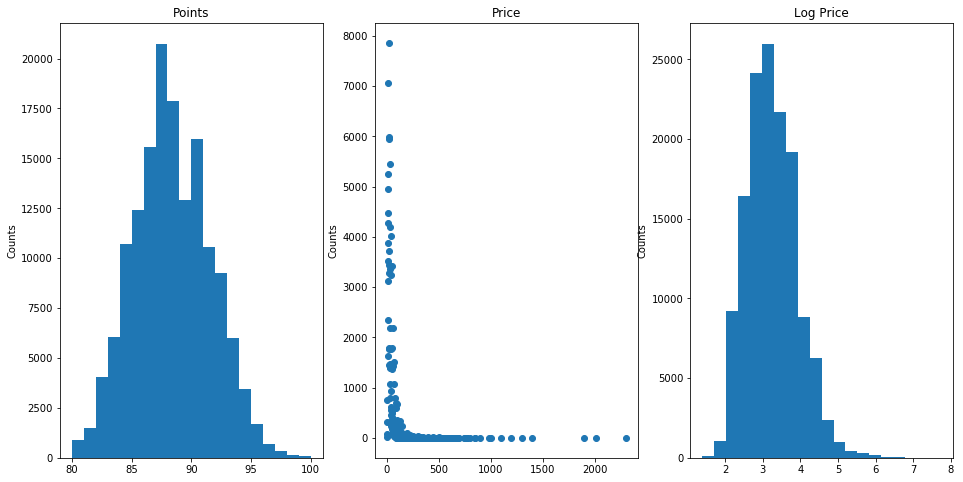

In [9]:
# As wine prices span 3 orders of magnitude, we shall have to take its natural log 
f,ax = plt. subplots(1,3, figsize = (16,8))
plt.subplot(1,3,1)
plt.hist(wine_drop.points.values,bins =20)
plt.title('Points')
plt.ylabel('Counts')
plt.subplot(1,3,2)
plt.scatter(wine_drop.price.dropna().value_counts().index,wine_drop.price.dropna().value_counts().values,)
plt.title('Price')
plt.ylabel('Counts')

plt.subplot(1,3,3)
plt.hist(np.log(wine_drop.price.dropna()).values,bins =20)
plt.title('Log Price')
plt.ylabel('Counts')
plt.show()

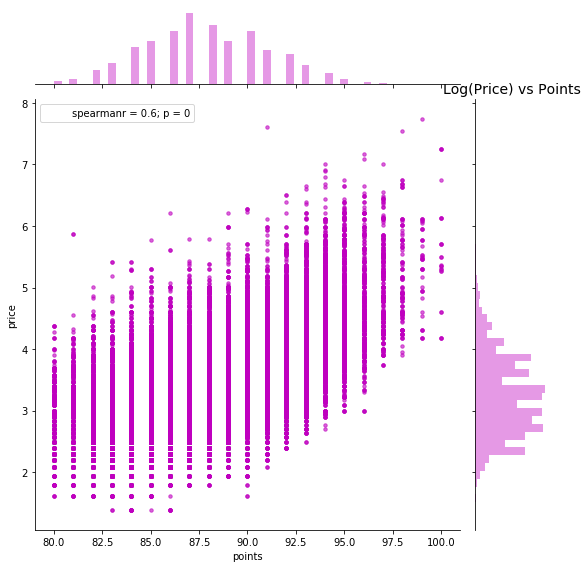

In [33]:
from scipy.stats import spearmanr

wine_drop.price = np.log(wine_drop.price)
sns.jointplot (x = 'points', y = 'price', data= wine_drop, kind = 'scatter',color = 'm', stat_func=spearmanr,size =8,s=12,alpha=0.6)
plt.title('Log(Price) vs Points',fontsize = 14)
plt.show()

### <div class = "alert alert-block alert-warning">  Based on Spearman correlation, there is indeed a positive correlation between Points and Price. Also it can be seen that the points data is actually made up of 20 discrete values spanning 80 - 100. This is also mentioned in the data dictionary which says that WineEnthusiasts only post reviews for wines that <font color='red'>score >=80</font>. Hence this dataset only consists of wine reviews on wines which have been awarded high points. <br> <br>Yet the distribution of wine price is skewed towards the lower ranges (closer to zero), instead of higher prices. This seems to suggest that WineEnthusiasts can award high points to all price tiers of wines, which is quite fishy to me. <br><br>  </div>

## Let's take a look at the distribution of the wines by Country

In [122]:
country_dist = pd.DataFrame(data = zip(wine_drop.country.value_counts().index, wine_drop.country.value_counts().values),
                            columns = ['country', 'counts'])
print 'Unique countries: ', wine_drop.country.nunique()
country_dist.head()

Unique countries:  48


country  counts
0      US   62397
1   Italy   23478
2  France   21098
3   Spain    8268
4   Chile    5816

In [18]:
data= [dict(type = 'choropleth',
            locations = country_dist['country'],
            z = country_dist['counts'],
            locationmode = 'country names',
            colorscale = 'RdYlBu',
            text = country_dist['country'])]
layout = dict(title = 'Wine descriptions distributed by Country',    
            geo = dict(
            showframe = True,
            showcoastlines = True))
fig = dict(data = data, layout=layout)

plotly.offline.plot(fig)#, output_type = 'file',filename='country_dist')

'file:///Users/bernt73/anaconda/DSI course/Projects/project-capstone/Wine review/country_dist.html'

In [ ]:
## If it doesn't show up, you have to try executing this cell a few times

In [32]:
%%HTML
<iframe width = '90%' height='600' src='country_dist.html'></iframe>  


## Provinces, Regions, Wineries

Province nuniques : 455
Region nuniques : 1236
winery nuniques : 14809


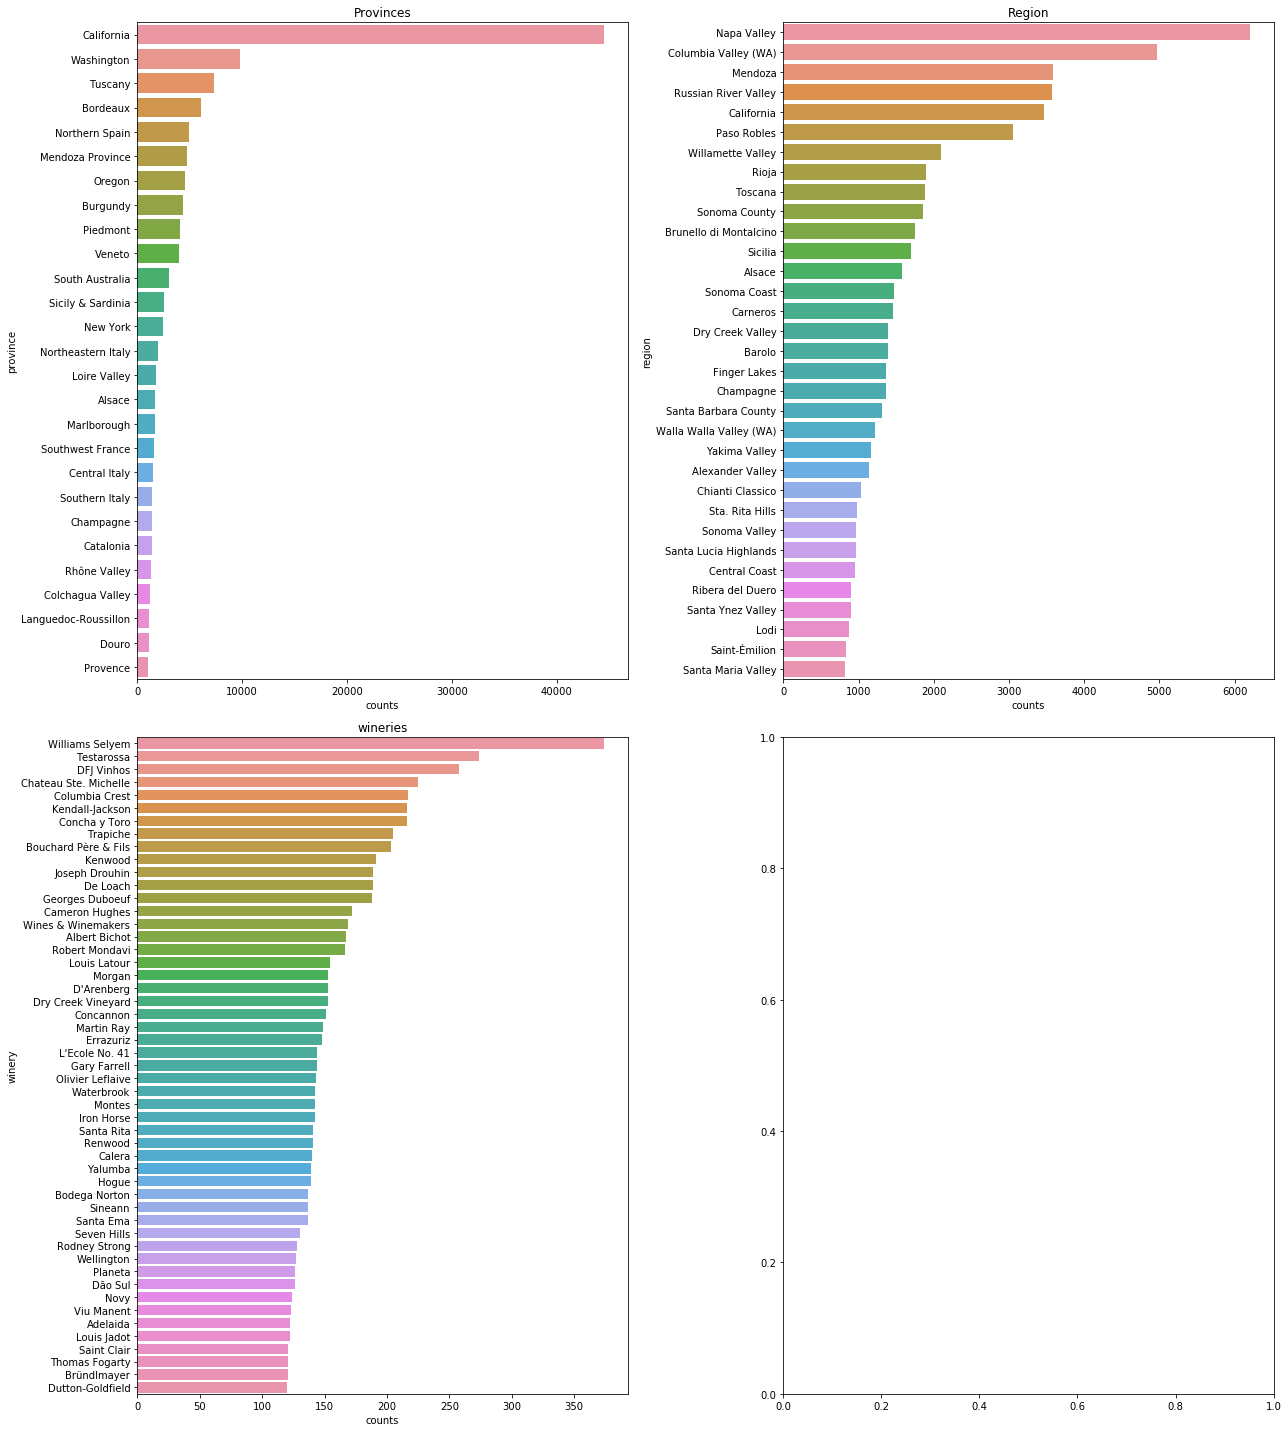

In [123]:
print 'Province nuniques :', wine_drop.province.nunique()
print 'Region nuniques :', wine_drop.region_1.nunique()
print 'winery nuniques :', wine_drop.winery.nunique()

f,ax =plt.subplots(2,2, figsize=(18,20))
p = pd.DataFrame(data = zip(wine_drop.province.value_counts().sort_values().index,wine_drop.province.value_counts().sort_values().values), 
                 columns = ['province','counts'])
p1 = p[p['counts']>=1000].sort_values('counts',ascending=False)

r = pd.DataFrame(data = zip(wine_drop.region_1.value_counts().sort_values().index,wine_drop.region_1.value_counts().sort_values().values), 
                 columns = ['region','counts'])
r1= r[r['counts']>=800].sort_values('counts',ascending=False)

w=pd.DataFrame(data = zip(wine_drop.winery.value_counts().sort_values().index,wine_drop.winery.value_counts().sort_values().values), 
                 columns = ['winery','counts'])
w1 =w[w['counts']>=120].sort_values('counts',ascending=False)

sns.barplot(x='counts',y='province',data = p1, label ='Provinces',ax = ax[0][0]).set_title('Provinces')
sns.barplot(x='counts',y='region',data = r1, label ='Region',ax = ax[0][1]).set_title('Region')
sns.barplot(x='counts',y='winery',data = w1, label ='wineries',ax = ax[1][0]).set_title('wineries')

plt.tight_layout()
plt.show()

In [124]:
countries_points = wine_drop.groupby('country',).points.describe()
countries_points.sort_values('mean',ascending=False)

count       mean       std   min    25%   50%  \
country                                                                   
England                     9.0  92.888889  1.364225  91.0  92.00  94.0   
Austria                  3057.0  89.276742  2.557063  81.0  88.00  89.0   
France                  21098.0  88.925870  3.199695  80.0  87.00  89.0   
Germany                  2452.0  88.626427  2.928762  80.0  87.00  89.0   
Italy                   23478.0  88.413664  2.728914  80.0  87.00  88.0   
Canada                    196.0  88.239796  2.467979  82.0  87.00  88.5   
Slovenia                   94.0  88.234043  2.007650  82.0  87.25  89.0   
Morocco                    12.0  88.166667  2.657180  82.0  87.00  88.5   
Turkey                     52.0  88.096154  1.575046  84.0  87.00  88.0   
Portugal                 5322.0  88.057685  2.881265  80.0  86.00  88.0   
Albania                     2.0  88.000000  0.000000  88.0  88.00  88.0   
US-France                   1.0  88.000000       NaN  88.0  88.00  88.0   
Australia                4957.0  87.892475  2.977779  80.0  86.00  88.0   
US                      62397.0  87.818789  3.410294  80.0  85.00  88.0   
Serbia                     14.0  87.714286  1.138729  86.0  87.00  88.0   
India                       8.0  87.625000  3.662064  82.0  85.75  89.5   
New Zealand              3320.0  87.554217  2.412322  80.0  86.00  87.5   
Hungary                   231.0  87.329004  3.405236  80.0  84.50  87.0   
Switzerland                 4.0  87.250000  3.403430  83.0  85.25  88.0   
South Africa             2258.0  87.225421  2.393895  80.0  86.00  87.0   
Israel                    630.0  87.176190  2.379511  80.0  85.00  87.0   
Luxembourg                  9.0  87.000000  0.866025  86.0  86.00  87.0   
Spain                    8268.0  86.646589  3.124243  80.0  84.00  87.0   
Chile                    5816.0  86.296768  2.701478  80.0  84.00  86.0   
Croatia                    89.0  86.280899  2.671350  81.0  84.00  87.0   
Greece                    884.0  86.117647  2.060733  80.0  85.00  86.0   
Tunisia                     2.0  86.000000  1.414214  85.0  85.50  86.0   
Argentina                5631.0  85.996093  3.095287  80.0  84.00  86.0   
Cyprus                     31.0  85.870968  2.642498  80.0  85.00  87.0   
Czech Republic              6.0  85.833333  0.752773  85.0  85.25  86.0   
Lebanon                    37.0  85.702703  2.856424  81.0  83.00  86.0   
Georgia                    43.0  85.511628  3.081219  81.0  83.00  85.0   
Bulgaria                   77.0  85.467532  2.562813  80.0  84.00  85.0   
Japan                       2.0  85.000000  0.000000  85.0  85.00  85.0   
Romania                   139.0  84.920863  2.239516  80.0  83.00  85.0   
Macedonia                  16.0  84.812500  2.713393  81.0  83.00  84.0   
Mexico                     63.0  84.761905  2.849529  80.0  83.00  84.0   
Bosnia and Herzegovina      4.0  84.750000  2.362908  83.0  83.00  84.0   
Moldova                    71.0  84.718310  2.736959  81.0  83.00  84.0   
Ukraine                     5.0  84.600000  1.140175  83.0  84.00  85.0   
Uruguay                    92.0  84.478261  2.755527  80.0  82.00  84.0   
Lithuania                   8.0  84.250000  0.462910  84.0  84.00  84.0   
Slovakia                    3.0  83.666667  2.886751  82.0  82.00  82.0   
Egypt                       3.0  83.666667  0.577350  83.0  83.50  84.0   
Brazil                     25.0  83.240000  1.665333  81.0  82.00  83.0   
Montenegro                  2.0  82.000000  0.000000  82.0  82.00  82.0   
China                       3.0  82.000000  0.000000  82.0  82.00  82.0   
South Korea                 4.0  81.500000  0.577350  81.0  81.00  81.5   

                          75%    max  
country                               
England                 94.00   94.0  
Austria                 91.00   98.0  
France                  91.00  100.0  
Germany                 91.00   97.0  
Italy                   90.00  100.0  
Ca

### It's quite interesting to note that the mean highest points come from <font color='red'>England and Austria </font>, rather than from France or Italy. Of course, England has very few data points, so we have to take it with a pinch of salt. However, Austria has a large number of data points, hence I believe that Austria is indeed producing many high quality wines there.
### On the other hand, although US has the largest number of wines in this dataset, the mean points garnered by them place US in a lowly position of 14th. It suggests that US wineries produce many average or below average wines.

In [125]:
countries_price = wine_drop.groupby('country',).price.describe()
countries_price.sort_values('mean',ascending=False)

count      mean       std       min       25%  \
country                                                                   
US-France                   1.0  3.912023       NaN  3.912023  3.912023   
England                     8.0  3.837776  0.218761  3.637586  3.682550   
Luxembourg                  9.0  3.693020  0.164252  3.583519  3.583519   
France                  14785.0  3.406882  0.803275  1.609438  2.833213   
Hungary                   230.0  3.383433  0.832804  1.945910  2.708050   
Canada                    194.0  3.362048  0.578121  2.484907  2.944439   
Italy                   18784.0  3.359660  0.685000  1.609438  2.833213   
US                      62139.0  3.339746  0.579289  1.386294  2.944439   
Germany                  2347.0  3.321543  0.699113  1.609438  2.890372   
Israel                    610.0  3.288143  0.543562  2.079442  2.890372   
Austria                  2483.0  3.282805  0.525018  2.079442  2.890372   
Mexico                     63.0  3.263297  0.431767  2.484907  3.044522   
Switzerland                 4.0  3.239688  0.312060  2.944439  3.019502   
Slovenia                   81.0  3.220478  0.482126  1.945910  2.995732   
Japan                       2.0  3.178054  0.000000  3.178054  3.178054   
Australia                4894.0  3.146610  0.683761  1.609438  2.708050   
Serbia                     14.0  3.130764  0.344173  2.708050  2.916712   
Lebanon                    37.0  3.125174  0.465921  2.484907  2.708050   
Uruguay                    85.0  3.099136  0.550099  1.945910  2.708050   
Turkey                     50.0  3.098416  0.493645  2.639057  2.708050   
New Zealand              3070.0  3.075240  0.439291  1.945910  2.772589   
Croatia                    83.0  3.040437  0.416602  2.484907  2.772589   
Albania                     2.0  2.995732  0.000000  2.995732  2.995732   
Spain                    8160.0  2.980269  0.696541  1.386294  2.484907   
Greece                    872.0  2.963445  0.459769  1.945910  2.639057   
Portugal                 4176.0  2.952694  0.711274  1.386294  2.397895   
Brazil                     25.0  2.901028  0.428678  2.397895  2.564949   
South Africa             2237.0  2.894519  0.527071  1.609438  2.484907   
Czech Republic              6.0  2.871522  0.208138  2.708050  2.708050   
Morocco                    12.0  2.852893  0.443877  1.791759  2.708050   
China                       3.0  2.845861  0.779381  1.945910  2.620874   
Georgia                    43.0  2.821227  0.443174  2.197225  2.564949   
Argentina                5587.0  2.807856  0.590410  1.386294  2.397895   
Chile                    5766.0  2.764671  0.541288  1.609438  2.397895   
Slovakia                    3.0  2.729563  0.037261  2.708050  2.708050   
Cyprus                     31.0  2.710019  0.252016  2.302585  2.484907   
Macedonia                  16.0  2.696384  0.251729  2.484907  2.484907   
Moldova                    71.0  2.629263  0.441580  2.079442  2.197225   
India                       8.0  2.599828  0.255197  2.302585  2.484907   
South Korea                 4.0  2.585242  0.216329  2.397895  2.397895   
Ukraine                     5.0  2.564949  0.000000  2.564949  2.564949   
Bosnia and Herzegovina      4.0  2.544939  0.040021  2.484907  2.544939   
Romania                   139.0  2.512984  0.563107  1.386294  2.197225   
Bulgaria                   77.0  2.375248  0.357878  1.945910  2.079442   
Lithuania                   8.0  2.302585  0.000000  2.302585  2.302585   
Montenegro                  2.0  2.302585  0.000000  2.302585  2.302585   
Egypt                       0.0       NaN       NaN       NaN       NaN   
Tunisia                     0.0       NaN       NaN       NaN       NaN   

                             50%       75%       max  
country                                               
US-France               3.912023  3.912023  3.912023  
England                 3.795426  3.896871  4.317488  
Luxembourg              3.583519  3.912023  3.912023  


### As for price, we again have a pleasant surprise in finding <font color = 'red'>England, Luxembourg,  Hungary and Canada </font> wines within the top 6 places, above US and Italy even.

In [126]:
wine_drop.groupby('country',).winery.describe().sort_values('count',ascending = False)

count unique                      top freq
country                                                           
US                      62397   4761          Williams Selyem  374
Italy                   23478   2571                  Planeta  126
France                  21098   2940     Bouchard Père & Fils  203
Spain                    8268   1436                Freixenet   88
Chile                    5816    292            Concha y Toro  216
Argentina                5631    523                 Trapiche  205
Portugal                 5322    372               DFJ Vinhos  258
Australia                4957    554               D'Arenberg  153
New Zealand              3320    332              Saint Clair  121
Austria                  3057    215              Bründlmayer  121
Germany                  2452    253               Dr. Loosen  112
South Africa             2258    301               Neil Ellis   60
Greece                    884    104                  Boutari   70
Israel                    630     36                 Recanati   97
Hungary                   231     34             Royal Tokaji   40
Canada                    196     40              Cave Spring   23
Romania                   139     24            Cramele Recas   27
Slovenia                   94     25                    Movia   14
Uruguay                    92     21  Establecimiento Juanico   13
Croatia                    89     31                   Bibich   16
Bulgaria                   77     15                     Vini   23
Moldova                    71     13                  Cricova   19
Mexico                     63     24                    Emevé    6
Turkey                     52     13                    Suvla   10
Georgia                    43     10                   Telavi   22
Lebanon                    37      5            Château Musar   20
Cyprus                     31      8           K&K; Vasilikon    8
Brazil                     25      7           Vinícola Miolo   16
Macedonia                  16      3                    Bovin   10
Serbia                     14      3                  Budimir   11
Morocco                    12      3             Ouled Thaleb    9
Luxembourg                  9      1     Mme Aly Duhr et Fils    9
England                     9      5     Wiston Estate Winery    3
Lithuania                   8      1                    Alita    8
India                       8      2                     Sula    6
Czech Republic              6      1             Vino z Czech    6
Ukraine                     5      1                Artemovsk    5
South Korea                 4      1          Keum Hwa Winery    4
Switzerland                 4      3                    Delea    2
Bosnia and Herzegovina      4      1            Winery Čitluk    4
Slovakia                    3      1             Château Bela    3
Egypt                       3      1         Sahara Vineyards    3
China                       3      2   Chateau Changyu-Castel    2
Montenegro                  2      1             Monte Cheval    2
Tunisia                     2      1          Domaine Neferis    2
Japan                       2      1            Croix Toriino    2
Albania                     2      1                   Arbëri    2
US-France                   1      1                   Deux C    1

##  Wine Variety Distribution

Variety nuniques:  632


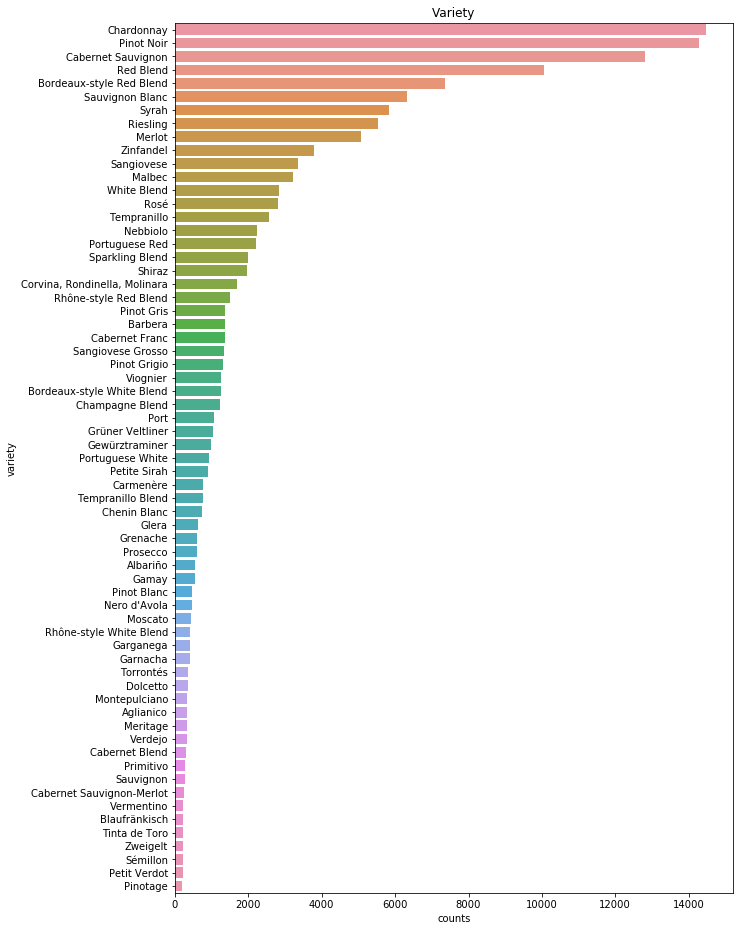

In [127]:
print 'Variety nuniques: ', wine_drop.variety.nunique()
plt.subplots(figsize=(10,16))
v=pd.DataFrame(data = zip(wine.variety.value_counts().sort_values().index,wine.variety.value_counts().sort_values().values), 
                 columns = ['variety','counts'])
v1 =v[v['counts']>=200].sort_values('counts',ascending=False)

sns.barplot(x='counts',y='variety',data = v1, label ='Variety').set_title('Variety')
plt.show()

In [34]:
wine_drop.groupby('variety').price.describe().sort_values('mean',ascending = False)

count      mean       std       min  \
variety                                                                    
Cabernet-Shiraz                        1.0  5.010635       NaN  5.010635   
Mazuelo                                2.0  4.587874  0.093460  4.521789   
Muscadel                              10.0  4.409977  1.259108  2.397895   
Carignan-Syrah                         1.0  4.382027       NaN  4.382027   
Syrah-Cabernet Franc                   3.0  4.234107  0.000000  4.234107   
Nasco                                  4.0  4.174387  0.000000  4.174387   
Picolit                               23.0  4.120829  0.583022  2.944439   
Tinta Francisca                        1.0  4.094345       NaN  4.094345   
Nebbiolo                            1529.0  4.049458  0.520051  2.639057   
Champagne Blend                     1003.0  4.044791  0.786047  1.945910   
Tokaji                                72.0  4.043807  0.631097  2.564949   
Tokay                                 17.0  3.998235  0.999477  2.708050   
Mission                                7.0  3.975611  1.135354  2.639057   
Sangiovese Grosso                    938.0  3.964853  0.524706  2.484907   
Crespiello                             2.0  3.951244  0.000000  3.951244   
Vidal                                  4.0  3.941068  0.361887  3.401197   
Dona Blanca                            2.0  3.920746  0.070068  3.871201   
Tinto Fino                            75.0  3.918234  1.016819  2.302585   
Malbec-Cabernet Franc                  1.0  3.912023       NaN  3.912023   
Mavrotragano                           1.0  3.912023       NaN  3.912023   
Pugnitello                             3.0  3.898555  0.011664  3.891820   
Malbec-Petit Verdot                    1.0  3.891820       NaN  3.891820   
Spatburgunder                         54.0  3.891418  0.657840  2.639057   
Trebbiano-Malvasia                     4.0  3.883675  0.443469  3.218876   
Sagrantino                            82.0  3.873193  0.361296  3.044522   
Petite Syrah                           2.0  3.838932  0.045636  3.806662   
Cabernet Blend                       301.0  3.820916  0.728247  2.079442   
Vermentino Nero                        2.0  3.806662  0.000000  3.806662   
Sangiovese-Syrah                       4.0  3.773444  0.287856  3.526361   
Debit                                  6.0  3.770479  1.207624  2.564949   
...                                    ...       ...       ...       ...   
Chardonnay-Pinot Gris                  1.0  2.302585       NaN  2.302585   
Tai                                    3.0  2.302585  0.000000  2.302585   
Alvarinho-Chardonnay                   2.0  2.297560  0.141896  2.197225   
Tempranillo-Garnacha                  60.0  2.292351  0.169582  2.079442   
Vilana                                 6.0  2.265790  0.082781  2.197225   
Shiraz-Tempranillo                     8.0  2.239913  0.233863  1.945910   
Semillon-Chardonnay                   16.0  2.219694  0.341262  1.791759   
Kiralyleanyka                          4.0  2.197225  0.000000  2.197225   
Chardonnay-Pinot Grigio                1.0  2.197225       NaN  2.197225   
Cserszegi Fuszeres                     4.0  2.197225  0.000000  2.197225   
Airen                                  6.0  2.175524  0.084877  2.079442   
Viura-Chardonnay                      11.0  2.163973  0.073776  2.079442   
Carinena                               1.0  2.079442       NaN  2.079442   
Pigato                                 2.0  2.079442  0.000000  2.079442   
Cabernet Sauvignon and Tinta Roriz     4.0  2.079442  0.000000  2.079442   
Malbec-Bonarda                         5.0  2.047992  0.568832  1.609438   
Macabeo-Moscatel                       3.0  1.990421  0.077094  1.945910   
Asprinio                               0.0       NaN       NaN       NaN   
Enantio                                0.0       NaN       NaN       NaN   
Espadeiro                              0.0       NaN       NaN       NaN   
Gelber Tr

In [35]:
wine_drop.groupby('variety').points.describe().sort_values('mean',ascending = False)

count       mean       std   min    25%   50%  \
variety                                                                   
Cabernet-Shiraz             1.0  96.000000       NaN  96.0  96.00  96.0   
Tokay                      17.0  93.294118  3.804023  86.0  90.00  93.0   
Sirica                      2.0  93.000000  1.414214  92.0  92.50  93.0   
Blauburgunder               1.0  93.000000       NaN  93.0  93.00  93.0   
Trousseau Gris              1.0  93.000000       NaN  93.0  93.00  93.0   
Muscadel                   10.0  92.900000  3.281260  88.0  91.00  93.0   
Roviello                    2.0  92.500000  0.707107  92.0  92.25  92.5   
Moscato di Noto             1.0  92.000000       NaN  92.0  92.00  92.0   
Malbec-Cabernet Franc       1.0  92.000000       NaN  92.0  92.00  92.0   
Torontel                    1.0  92.000000       NaN  92.0  92.00  92.0   
Nasco                       5.0  92.000000  0.000000  92.0  92.00  92.0   
Carignan-Syrah              1.0  92.000000       NaN  92.0  92.00  92.0   
Caprettone                  1.0  92.000000       NaN  92.0  92.00  92.0   
Chardonnay-Albarino         4.0  91.750000  0.500000  91.0  91.75  92.0   
Provence red blend         25.0  91.680000  1.651262  87.0  91.00  92.0   
Black Monukka               4.0  91.500000  1.000000  90.0  91.50  92.0   
Loin de l'Oeil              4.0  91.500000  0.577350  91.0  91.00  91.5   
Sercial                     2.0  91.500000  0.707107  91.0  91.25  91.5   
Rieslaner                   2.0  91.500000  2.121320  90.0  90.75  91.5   
Tannat-Cabernet Franc       9.0  91.444444  1.810463  90.0  90.00  90.0   
Zierfandler                11.0  91.363636  1.747726  87.0  91.00  92.0   
Vidal                       4.0  91.250000  0.500000  91.0  91.00  91.0   
Picolit                    29.0  91.034483  2.665692  88.0  89.00  90.0   
Malbec-Petit Verdot         1.0  91.000000       NaN  91.0  91.00  91.0   
Roussanne-Grenache Blanc    2.0  91.000000  0.000000  91.0  91.00  91.0   
Grenache Gris               1.0  91.000000       NaN  91.0  91.00  91.0   
Baga-Touriga Nacional       1.0  91.000000       NaN  91.0  91.00  91.0   
Samling                     2.0  91.000000  2.828427  89.0  90.00  91.0   
Nerello Cappuccio           4.0  90.750000  1.500000  89.0  89.75  91.0   
Roter Traminer              7.0  90.714286  0.487950  90.0  90.50  91.0   
...                         ...        ...       ...   ...    ...   ...   
Pansa Blanca                6.0  83.666667  4.131182  80.0  80.00  83.0   
Pignoletto                  3.0  83.666667  1.527525  82.0  83.00  84.0   
Cserszegi Fuszeres          4.0  83.500000  0.577350  83.0  83.00  83.5   
Tempranillo-Garnacha       60.0  83.333333  1.910423  80.0  82.00  83.0   
Tempranillo Blanco          9.0  83.111111  1.364225  81.0  83.00  83.0   
Harslevelu                  4.0  83.000000  1.154701  82.0  82.00  83.0   
Pardina                     1.0  83.000000       NaN  83.0  83.00  83.0   
Moscatel de Alejandria      1.0  83.000000       NaN  83.0  83.00  83.0   
Forcalla                    1.0  83.000000       NaN  83.0  83.00  83.0   
Malvasia-Viura              2.0  83.000000  1.414214  82.0  82.50  83.0   
Viura-Verdejo               1.0  83.000000       NaN  83.0  83.00  83.0   
Premsal                     1.0  83.000000       NaN  83.0  83.00  83.0   
Carinena                    1.0  83.000000       NaN  83.0  83.00  83.0   
Merlot-Petite Verdot        1.0  83.000000       NaN  83.0  83.00  83.0   
Chardonel                   1.0  83.000000       NaN  83.0  83.00  83.0   
Athiri                      2.0  83.000000  0.000000  83.0  83.00  83.0   
Asprinio                    1.0  83.000000       NaN  83.0  83.00  83.0   
Chardonnay-Pinot Gris       1.0  83.000000       NaN  83.0  83.00  83.0   
Chambourcin                16.0  82.875000  2.305790  80.0  81.50  82.0   
Merlot-Argaman              4.0  82.750000  1.500000  82.0  82.00  82.0   
Gragnano                    2.0  82.500000  2.12132

### The wine variety distribution didn't throw up any surprises here, as we can see that most of the wines in this dataset are <font color = 'red'>Chardonnay, Pinot Noir, and Cabernet Sauvignon.</font> These are very well-known household names across the world. However, they are not the highest priced or highest rated varieties. 
#### <font color = 'red'> Highest priced variety -> Muscadel, Picolit, Nebbiolo, Champagne Blend <br> Highest points variety -> Tokay, Muscadel</font>

### Summarizing the information from the data visualisation section, in terms of pure numbers we have :
> #### 1. 48 Countries - Top country (US)
> #### 2. 455 Provinces - Top province (California)
> #### 3. 1236 Regions - Top region (Napa Valley)
> #### 4. 14809 Wineries  - Top winery (Williams Selyem)
> #### 5. 632 Varieties - Top variety (Chardonnay) 

### All these are in text format, and have to be treated as categorical features

## <div class = 'alert alert-block alert-info'> ** 3. NLP analysis - word distribution and sentiment analysis of the text corpus**</div>
---
### In this section, we will start to analyze the text description column and use the <font color = 'red'>NLTK </font>package to clean up punctuation and common stop words so as to analyze the distribution of significant words in the text corpus. <br><br> Thereafter, we will use a package called <font color = 'red'>Vader </font>to analyze the sentiment of each review document and determine its <font color = 'blue'>Positive, Negative, Neutral and Compound scores</font>. These scores can be used in the following section to help us perform Regression on the wine prices.

In [16]:
import nltk
from sklearn.feature_extraction import stop_words
import itertools
from nltk.tokenize import PunktSentenceTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
import string
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [8]:
# Clean up text by removing stop words, lemmatize and remove punctuations. Create a clean corpus and save to pickle 
# for further analysis

stop_words_1 = stop_words.ENGLISH_STOP_WORDS
lemmatizer = WordNetLemmatizer()
punctuation = set(string.punctuation) 

def cleaning(article):
    '''Function to convert characters to lower case, clean up stop words, punctuations and lemmatize the words
    : article - series of text documents
    Returns - a list of cleaned strings of text'''
    
    one = " ".join([i for i in article.lower().split() if i not in stop_words_1])
    two = "".join(i for i in one if i not in punctuation)
    three = " ".join(lemmatizer.lemmatize(i) for i in two.split())
    return three

clean_corpus = []
num_words=0
for desc in wine_drop.description:
    clean_corpus.append(cleaning(desc))           ## Clean up the text and add to our clean corpus
    num_words += len(desc.split(' '))              ## List to count total num of words in the text corpus
    
print 'Total number of words: ', num_words    
print 'Length of clean corpus: ', len(clean_corpus)

Total number of words:  6066350
Length of clean corpus:  150925


In [15]:
## Break down our clean corpus (in sentence form) into individual words (tokens) to form a token corpus 
## and convert to pickle for easy retrieval

#gensim.utils.pickle(clean_corpus, 'clean_corpus')          # Uncomment if pickling to a new pickle file
clean_corpus = gensim.utils.unpickle('clean_corpus')
wine_drop.description = clean_corpus                        # Replace the description column of our dataframe with the
                                                            # clean corpus

#token_corpus = [nltk.word_tokenize(sent.decode('utf-8')) for sent in clean_corpus]  
#gensim.utils.pickle(token_corpus,'token_corpus')           # Uncomment if pickling to a new pickle file
token_corpus = gensim.utils.unpickle('token_corpus')

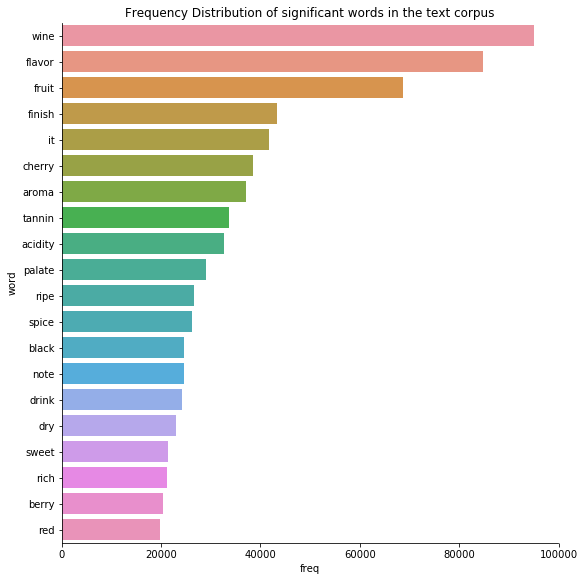

In [51]:
# What are the most frequently occurring words in our text corpus??

tokens = list(itertools.chain.from_iterable(token_corpus))
wordfreq = nltk.FreqDist(tokens)
word = []
freq = []
dfword= pd.DataFrame(columns = ['word', 'freq'])
for i in wordfreq.most_common(20):
    word.append(i[0])
    freq.append(i[1])
    
dfword.word = word
dfword.freq = freq
sns.factorplot(y='word', x='freq', data=dfword, kind = 'bar',size = 8)
plt.title('Frequency Distribution of significant words in the text corpus')
plt.show()

In [15]:
'it' in stop_words_1

True

The top 5 most frequently occurring words in this text corpus are : "wine", "flavor", "fruit", "finish" and "it". The first 4 are quite logical, very common words that we would usually associate with wines. However, the 5th word "it" is a surprise, as the english word "it" is a stop word that should have been cleaned up above. So why is it still appearing in our frequency distribution list? I believe this "it" should be due to the short form of "ITALY" -> "IT" and converted to lower case. Hence it escaped the stop words clean up. 

<div class= 'alert alert-block alert-warning'> ** Sentiment analysis using Vader - Valence  Aware  Dictionary  for 
sEntiment Reasoning** <br>
<br>This package tries to compute polarity_scores by collecting a list of "sentiments":<br>
<br>
 - Checks whether just some words in the input are ALL CAPS <br>
 - Determine if input contains negation words <br>
 - Checks for the word "but" too! <br>
 - Checks if the preceding words increase, decrease, or negate/nullify the valence (BOOSTER_DICT: B_INCR, B_DECR) <br>
 - Checks if booster/dampener word is in ALLCAPS <br>
 - Handles emoticons too!! <br>

</div>

In [19]:
senanalyze = SentimentIntensityAnalyzer()
cpd,neu,neg,pos = [],[],[],[]

# Loop through our clean corpus to compute the sentiment score for each review text string
for sent in clean_corpus:
    vs = []
    vs = senanalyze.polarity_scores(sent)
    cpd.append(vs['compound'])
    neu.append(vs['neu'])
    neg.append(vs['neg'])
    pos.append(vs['pos'])

## Create 4 new columns in our wine_drop dataframe to store our sentiment scores    
wine_drop['pos'] = pos
wine_drop['neg'] = neg
wine_drop['neu'] = neu
wine_drop['cpd'] = cpd

### Let's plot a heat map of the correlation between price and points against each class of sentiment score. <br><br> Disappointingly, it appears that none of the sentiment scores have much correlation with either points or price


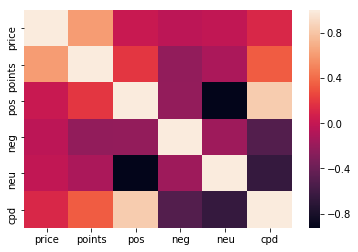

In [134]:
sns.heatmap(wine_drop[['price','points','pos','neg','neu','cpd']].corr())    
plt.show()

In [135]:
wine_drop[['price','points','pos','neg','neu','cpd']].describe()

price         points            pos            neg  \
count  137230.000000  150925.000000  150925.000000  150925.000000   
mean        3.243772      87.888527       0.218189       0.023884   
std         0.662619       3.222290       0.133115       0.050770   
min         1.386294      80.000000       0.000000       0.000000   
25%         2.772589      86.000000       0.121000       0.000000   
50%         3.178054      88.000000       0.216000       0.000000   
75%         3.688879      90.000000       0.311000       0.000000   
max         7.740664     100.000000       0.789000       0.692000   

                 neu            cpd  
count  150925.000000  150925.000000  
mean        0.757930       0.552302  
std         0.131893       0.359909  
min         0.211000      -0.932100  
25%         0.665000       0.381800  
50%         0.758000       0.670500  
75%         0.852000       0.836000  
max         1.000000       0.992400

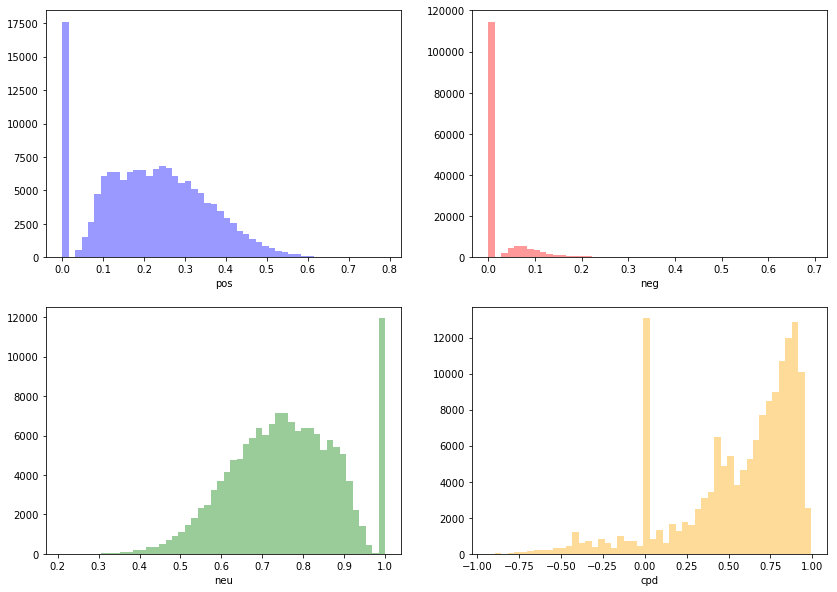

In [136]:
## Let's plot the distribution of each of the sentiment scores
f,ax =plt.subplots(2,2, figsize= (14,10))
sns.distplot(wine_drop['pos'], kde=False, ax=ax[0][0], color = 'blue')
sns.distplot(wine_drop['neg'], kde=False, ax=ax[0][1], color = 'red')
sns.distplot(wine_drop['neu'], kde=False, ax=ax[1][0], color = 'green')
sns.distplot(wine_drop['cpd'], kde=False, ax=ax[1][1], color = 'orange')
plt.show()

#### <div class = "alert alert-block alert-warning"> There are very few text documents with negative sentiments. Most of them are either neutral or positive. This is also to be expected as the WineEnthusiasts have confirmed that only reviews for wines with >80 points are posted. VADER has helped to confirm that the <font color='red'> sentiment range of our text corpus is actually quite narrow. </font> <br><br> So let's drop the neg sentiment column since it doesn't provide much info anyway.</div>

In [24]:
wine_drop.drop('neg',axis = 1, inplace = True)

### Let's drill deeper into the Compound sentiment scores, and ask the question: if we set a Cpd score threshold of say 0.1 or 0.2 and take those wine reviews with Cpd scores above it, what would be the mean Price or mean Points of that subset of wine reviews? <br><br>We will plot out the distribution for various threshold cutoff scores ranging from 0 to 0.8 and see the effect on both Price and Points.

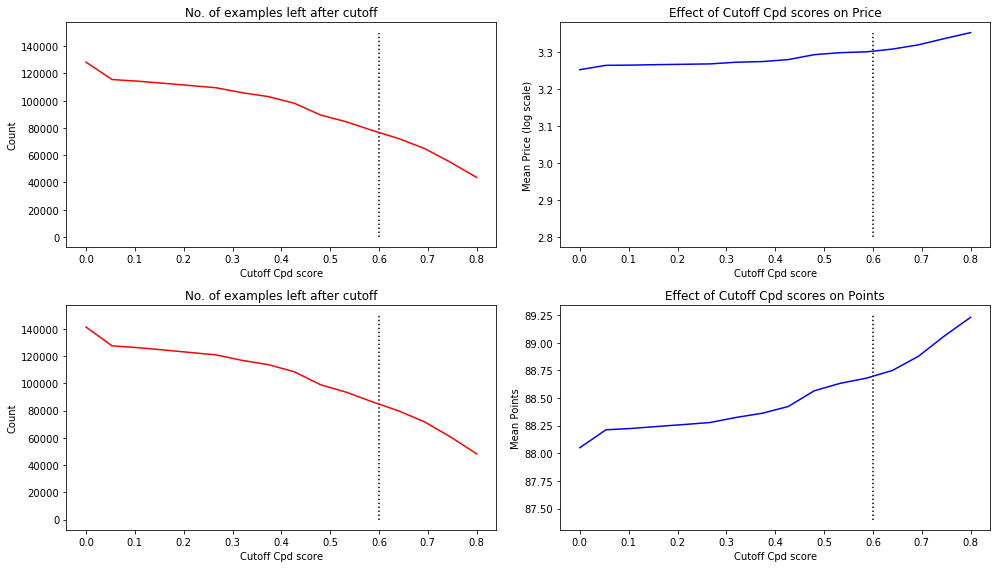

In [20]:
po1,po2,pr1,pr2,x1 = [],[],[],[],[]
for i in np.linspace(0,0.8,16):
    pr1.append(wine_drop[wine_drop.cpd >= i][['price']].describe().loc['count',:])
    pr2.append(wine_drop[wine_drop.cpd >= i][['price']].describe().loc['mean',:])
    po1.append(wine_drop[wine_drop.cpd >= i][['points']].describe().loc['count',:])
    po2.append(wine_drop[wine_drop.cpd >= i][['points']].describe().loc['mean',:])
    x1.append(i)
f,ax = plt.subplots(2,2,figsize=(14,8))

plt.subplot(221)
plt.xlabel('Cutoff Cpd score')
plt.ylabel('Count')
plt.plot(x1,pr1,'r-')
plt.title('No. of examples left after cutoff')
plt.vlines(0.6,0,150000,color='k',linestyles='dotted')
plt.subplot(222)
plt.plot(x1,pr2,'b-')
plt.vlines(0.6,2.8,3.35,color='k',linestyles='dotted')
plt.title('Effect of Cutoff Cpd scores on Price')
plt.xlabel('Cutoff Cpd score')
plt.ylabel('Mean Price (log scale)')

plt.subplot(223)
plt.xlabel('Cutoff Cpd score')
plt.ylabel('Count')
plt.plot(x1,po1,'r-')
plt.vlines(0.6,0,150000,color='k',linestyles='dotted')
plt.title('No. of examples left after cutoff')
plt.subplot(224)
plt.plot(x1,po2,'b-')
plt.vlines(0.6,87.4,89.25,color='k',linestyles='dotted')
plt.title('Effect of Cutoff Cpd scores on Points')
plt.xlabel('Cutoff Cpd score')
plt.ylabel('Mean Points')
plt.tight_layout()
plt.show()

### We can see that higher Cpd scores indeed has some impact on the mean prices or points. As the threshold  value increases, so does the mean wine price or point. 

In [145]:
## What are some of the words that give neutral scores of 1.0 ??
wine_drop[(wine_drop.cpd==0) & (wine_drop.pos==0)][['description','cpd','pos','neu','points','price']].head(20)    

description  \
24     san josebased producer adam comartin head 1100 foot mountain source fruit tremendous wine offer wild cherry sage eucalyptus scent nose ripe black plum strawberry fruit lead palate followed aciddriven wave juniper pine bay leaf finishing menthollike sensation   
30                                                                                       bulgarian mavrud present nose suggestion dried cherry black plum freshly ground black pepper whiff eucalyptus mouth balanced soft tannin mingling dried cherry cassis black plum   
37                                                                aroma forest floor violet red berry whiff dark baking spice unfold glass wild cherry black raspberry ground pepper star anise drive palate framed firm finegrained tannin classic tuscan red drink 2020   
44                                                                                                             dark color flavor profile mediumbodied cornas boast aroma flavor reminiscent chocolate fudge espresso plummy fruit framed soft dusty tannin drink now–2025   
46                                                                                                   sunbaked earth ripe berry baking spice whiff menthol meld glass juicy palate offer red cherry pomegranate star anise mocha hint tobacco alongside finegrained tannin   
47                                                                   blended 9 malbec 9 cabernet franc 5 petit verdot perennial classic winery sister brand cuvaison juicy cherry cassis sustains big pillowy tannin tar suggesting time fruit match structure drink 2020   
59                                              savory blend 40 merlot 30 cabernet sauvignon 25 cabernet franc 5 syrah open aroma roasted coffee bean leather tobacco dark woodland berry chewy palate offer juicy plum cassis clove alongside polished tannin drink 2019   
66                                                                                                                                 steely character young chablis apparent wine crisp lemon flavored mineral edge wine juicy freshness young heart needing age drink 2018   
79                                                                                                            underbrush smoke mocha dark fruit aroma lead nose carry ripe palate dried black cherry licorice clove firm velvety tannin provide framework drink 2018–2028   
82                                               berry baking spice dried iris mint hint vanilla come structured wine palate note white pepper sage anise orange zest yellow peach accent red cherry core balsamic note close finish firm refined tannin provide backbone   
97                                                                                                      blended small amount merlot cabernet franc petit verdot malbec austere unfussy red modest quantity crisp red currant cranberry flavor interwoven cedar dried herb   
100                                                                                                                        juicy kiwi lime blossom sour apple candy aroma nose ripe white—the 2016 submitted region palate oily texture honeydew limekiwibubblegum flavor   
105                                                                                                                                                              aroma ripe leaning overripe apple melon orange peel followed mediumsweet fruit flavor need acid stand up   
115                                                                                                 aroma prune raisin black plum gritty chunky fullbodied palate feel grabby taste generic blackberry burnt coffee dark chocolate steady plump rubbery finish close show   
118                                                                                                                                                   softly fruity wine lightest tannin plenty simple redberry fruit earth

In [15]:
## What about those that have been given Cpd scores above 0.9 ??
wine_drop[wine_drop.cpd>=0.9][['description','cpd','pos','neu','points','price']].head(20) 

description  \
0                                                          tremendous 100 varietal wine hail oakville aged year oak juicy redcherry fruit compelling hint caramel greet palate framed elegant fine tannin subtle minty tone background balanced rewarding start finish year ahead develop nuance enjoy 2022–2030   
10      elegance complexity structure come dropdead gorgeous winethat rank italy greatest white open sublime yellow spring flower aromatic herb orchard fruit scent creamy delicious palate seamlessly combine juicy white peach ripe pear citrus flavor white almond savory mineral note grace lingering finish   
14                     sophisticated mix mineral acid tart fruit seductive effort plea start finish supple dense it got strawberry blueberry plum black cherry touch chocolate underlying streak mineral element good proportion finish appealing silky texture it delicious already decade enjoyment drink 2028   
17                                                   nicely oaked blackberry licorice vanilla charred aroma smooth sultry outstanding wine excellent year forward barrelspice mocha flavor adorn core blackberry raspberry fruit run long taste vaguely chocolaty velvety finish enjoy topnotch tempranillo 2030   
18                                                                            coming sevenacre vineyard named dovecote property magnificent wine powered fruit tannin 28 month new wood aging darkly rich great concentration sign pedigree elegance here restraint new wine make wine longterm aging drink 2022   
80                                                                                                                                                               generous blackcherry fruit anchor barrelaged wine remains tartly acidic pretty accent toast mocha focused young fresh drink optimally 2018–2028   
104                                                                                                                              fan stickies pleasure bottling tremendously sweet oily candied honeydew kiwi scent meet sweet juniper pine nose palate taste squarely golden honey it soft unctuous consistency   
113                                                                                                                                                                   savory apple pear mingle lemon bramble slightly earthy offdry riesling sunny tangerine acidity easy bright leading delicately sweet finish   
124                                                                                       wine tasty tangy nervy bringing refreshing appetizing mouthfeel wonderful fresh acidity tang show good fruitiness too redcherry cranberry flavor vivid concentrated it versatile wine drink buy case save bottle aging   
133                                                                                                                           delightfully crisp elegant lipsmacking wine thats subtle easy love lemon peel apple skin pear play well distracting instead integrating light hint oak food friendly it great deal   
153                                                                                                                                                                                        bright aroma citrus tropical fruit easygoing white easy appeal balanced fresh it elegant wine pair grilled fish salad   
175                                                                                                                       pleasant redfruit aroma cherry raspberry low octane toro fresh overly dense palate lively vital wild berry plum brown sugar flavor warm heady generous finish fruity bright drink 2018   
218                                                                                  paradis parcel pfingstberg grand cru giving particularly fine rich riesling ripe fullbodied wine manages preserve elegance style grape having tropical fruit juicy acidity warm rounded aftertaste certainly

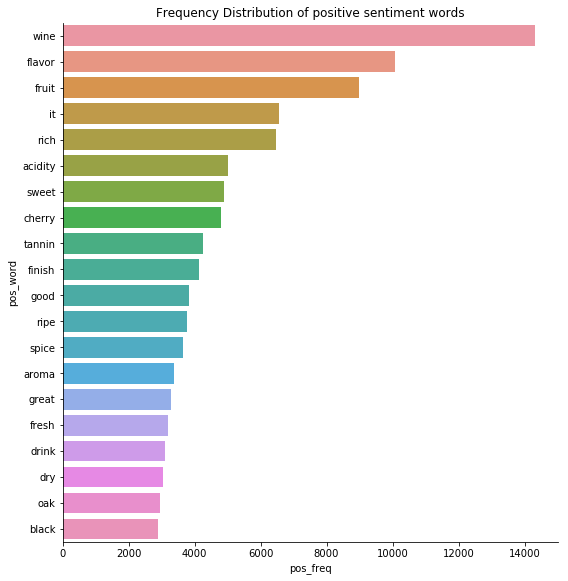

In [17]:
## Let's find out the most frequently occuring words in reviews that score above 0.9 in Cpd score
pos_token = [nltk.word_tokenize(sent) for sent in wine_drop[wine_drop.cpd>=0.9].description] 
postokens = list(itertools.chain.from_iterable(pos_token))
posfreq = nltk.FreqDist(postokens)
pos_word = []
pos_freq = []
dfpos= pd.DataFrame(columns = ['pos_word', 'pos_freq'])
for i in posfreq.most_common(20):
    pos_word.append(i[0])
    pos_freq.append(i[1])
    
dfpos.pos_word = pos_word
dfpos.pos_freq = pos_freq
sns.factorplot(y='pos_word', x='pos_freq', data=dfpos, kind = 'bar',size = 8)
plt.title('Frequency Distribution of positive sentiment words')
plt.show()

#### <div class = "alert alert-block alert-warning"> We don't see a stark difference in word frequency distribution for reviews with high Cpd scores above 0.9, the top 3 frequently occurring words are still "wine", "flavor" and "fruit". But we should also note that the word  <font color='red'>"rich" </font>climbed from 18th to 5th position. The word 'rich' must be favoured by WineEnthusiasts for describing higher rated wines. <br><br> From above, although reviews with high neutral sentiment scores can also be given to wines with high points (95), we also saw that higher Cpd sentiment scores reflected higher mean prices or points. <br><br>  Having said that, it may be that wine prices or points are not determined by sentiment scores of their reviews, but rather by more technical terms like aging, vintage, or barrel which are not picked up by the sentiment scores. Hopefully the Regression or Classification models below can help us pick up those keywords. <br><br>  </div>



## <div class = "alert alert-block alert-info"> 4. Regression: Predicting wine prices </div>
---
#### Now that we have a better understanding of the review text, let's try to put together all the features and try to predict the price of the wine for the missing values: 
<font color = 'green'>
> 1. Country <br> 
> 2. Province <br>
> 3. Variety <br> 
> 4. Winery <br> 
> 5. Region <br> 
> 6. Reviews  </font>
#### For the features of Country, Province, Variety, Winery, and Region, we can use Label Encoder and OneHotEncoder to convert them to dummy columns. As for the Reviews column, we will use TFIDF to help us filter the words and retain significant words based on their frequency in the reviews as features and convert to word vectors. <br><br> For the choice of Regressors, we will use 4 Regressors - <font color='red'>Lasso, Ridge, Random Forest and Gradient Boosting Regressor</font>. <br><br>Lasso and Ridge are powerful techniques generally used for creating parsimonious models in the presence of a ‘large’ number of features. <br><br>Random Forest is an ensemble method that applies Bagging techniques to train multiple decision trees on different parts of the same training set, and averages them with the aim of reducing variance. <br><br>Finally Gradient Boosting is an ensemble method that tries to fit subsequent models to the residuals of the last model in a sequential manner in order to reduce bias. <br><br> These 4 regressors provide a good coverage of <font color='red'>regularization, bagging and boosting techniques</font> to help us better understand our results.

In [2]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor,RandomForestRegressor,RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV
from sklearn.tree import DecisionTreeRegressor

In [3]:
#wine_drop.to_pickle('wine_sentiment.pickle')

wine_drop = pd.read_pickle('wine_sentiment.pickle')
wine_drop.reset_index(drop=True, inplace = True)    # Index of the original wine_drop dataframe is no longer in sequence 
                                                    # after we dropped a few of the rows. If we do not reset the index,
                                                    # X_train dataframe will have a rows of NaNs generated from the
                                                    # .loc method later on

In [12]:
c = wine_drop.country.nunique()
p = wine_drop.province.nunique()
v = wine_drop.variety.nunique()
w =wine_drop.winery.nunique()
r = wine_drop.region_1.nunique()
print c+p+v+w+r                     # How many dummy columns would be generated if i take all these 5 categorical 
                                    # features at the same time?? We are dealing with >17000 classes!!
                                    

17170


In [17]:
%%time
# Create our feature columns

cat1 = ['country','province','variety']
#cat2 = ['winery','region_1']               ## There are 14809 wineries, if we get 14809 dummy columns, it may take a  
                                            ## long time, and kernel may break. Let's work on the other features first.
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
ohe = OneHotEncoder()
tfidf_vec1 = TfidfVectorizer(sublinear_tf=True,max_df=0.7,max_features=4000, ngram_range = (1,3), stop_words='english')

# Label encode and one-hot encode our province, variety, and country features. TFIDF our text description column
Xprov = ohe.fit_transform(le1.fit_transform(wine_drop.province).reshape(-1,1))
Xvar = ohe.fit_transform(le2.fit_transform(wine_drop.variety).reshape(-1,1))
Xcoun = ohe.fit_transform(le3.fit_transform(wine_drop.country).reshape(-1,1))
Xtext = tfidf_vec1.fit_transform(wine_drop.description)

# Create dataframes with column names that represent the respective classes of the features
Xprovdf = pd.DataFrame(data = Xprov.toarray(), columns = le1.classes_.tolist())
Xvardf = pd.DataFrame(data = Xvar.toarray(), columns = le2.classes_.tolist())
Xcoundf = pd.DataFrame(data = Xcoun.toarray(), columns = le3.classes_.tolist())
Xtextdf = pd.DataFrame(data = Xtext.toarray(), columns = tfidf_vec1.get_feature_names())

# Concatenate all the above 4 dataframes into 1 large dataframe called cat1_dummy
cat1_dummy = pd.concat([Xprovdf,Xvardf,Xcoundf,Xtextdf], axis = 1)

CPU times: user 55.6 s, sys: 11.1 s, total: 1min 6s
Wall time: 1min 9s


In [18]:
%%time
# Create our initial X_train dataframe by subsetting out those rows with prices from cat1_dummy dataframe, and 
# X_test for those rows without prices. Then we join in the 'points', 'pos', 'neu', and 'cpd' scores into the columns.

X_test = cat1_dummy.loc[wine_drop[wine_drop.price.isnull()].index,:]
# Join back the 'points','pos','neu','cpd' columns
X_test = pd.concat([X_test, wine_drop[wine_drop.price.isnull()][['points','pos','neu','cpd']]], axis = 1) 

X_train = cat1_dummy.loc[wine_drop[~wine_drop.price.isnull()].index,:]
# Join back the 'points','pos','neu','cpd' columns
X_train = pd.concat([X_train, wine_drop[~wine_drop.price.isnull()][['points','pos','neu','cpd']]],axis = 1) 
y_train = wine_drop[~wine_drop.price.isnull()]['price']

ss = StandardScaler()
X_train['points'] = ss.fit_transform(X_train['points'].reshape(-1, 1))  # The price column has been np.log, 
                                                                        # only the points column need to be scaled now
X_test['points'] = ss.transform(X_test['points'].reshape(-1, 1))

CPU times: user 20.5 s, sys: 43.2 s, total: 1min 3s
Wall time: 1min 21s


### For the winery and region_1 features, let's adopt a different approach due to the sheer size of the classes (>15000 in all). Let's use Anova to help us filter out most of the insignificant classes.

### For regions, we can use SelectKBest to help us filter. However, for wineries, it was found that SelectKBest couldn't complete the filtering process and kept causing my kernel to restart. Hence, I had no other choice but to use SelectPercentile instead. 

In [8]:
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

sel_perc = SelectPercentile(f_classif, percentile = 30)
skbcls = SelectKBest(f_classif, k=30)
le4 = LabelEncoder()
le5 = LabelEncoder()
ohe1 = OneHotEncoder()

Xregion = ohe1.fit_transform(le4.fit_transform(wine_drop.region_1).reshape(-1,1))
Xwinery = ohe1.fit_transform(le5.fit_transform(wine_drop.winery).reshape(-1,1))

Xregiondf = pd.DataFrame(data = Xregion.toarray(), columns = le4.classes_.tolist())
Xwinerydf = pd.DataFrame(data = Xwinery.toarray(), columns = le5.classes_.tolist())


#### <font color='red'>Be careful with the next 3 cells, memory intensive due to the sheer number of classes involved. The cells are split up more finely for a good reason. Each cell can only perform 1 or 2 lines of code due to the memory requirements. Try to read in the pickled file wherever possible </font>

In [6]:
### Very memory intensive, have to create winery dataframe after restarting kernel and saving to pickle file right away
Xwinery_train = Xwinerydf.loc[wine_drop[~wine_drop.price.isnull()].index,:]     
y_train = wine_drop[~wine_drop.price.isnull()]['price']

In [5]:
## Initially I had wanted to use SelectKbest for filtering both wineries and regions, but due to the sheer 
## number of classes for wineries, my kernel kept restarting when using SelectKBest. Hence I had no choice but to 
## use SelectPercentile instead for it.

sel_perc.fit(Xwinery_train,ytrain)      
anova2 =pd.DataFrame (data =zip(Xwinery_train.columns, sel_perc.scores_,sel_perc.pvalues_,sel_perc.get_support(indices=False)),columns = 
                     ['Col','Scores','p-value','ClsSupport']).sort_values('Scores',ascending=False)
winery_sel_col = anova2[anova2['p-value'] < 0.001].Col.tolist()
len(winery_sel_col)

1667

In [4]:
#Xwinery_train.drop([h for h in Xwinery_train.columns.tolist() if h not in winery_sel_col], axis = 1,inplace = True)
#Xwinery_train.to_pickle('Xwinery_train.pickle')             ### The pickle file is 1.8 Gb in size!!!  ###
Xwinery_train = pd.read_pickle('Xwinery_train.pickle')
print Xwinery_train.shape

(137230, 1667)


In [11]:
Xregion_train = Xregiondf.loc[wine_drop[~wine_drop.price.isnull()].index,:]
ytrain = wine_drop[~wine_drop.price.isnull()]['price']
skbcls.fit(Xregion_train,ytrain)
anova1 =pd.DataFrame (data =zip(Xregion_train.columns, skbcls.scores_,skbcls.pvalues_,skbcls.get_support(indices=False)),columns = 
                     ['Col','Scores','p-value','ClsSupport']).sort_values('Scores',ascending=False)
region_sel_col = anova1[anova1['p-value'] < 0.001].Col.tolist()
len(region_sel_col)

235

In [12]:
Xregion_train.drop([h for h in Xregion_train.columns.tolist() if h not in region_sel_col], axis = 1,inplace = True)

print Xregion_train.shape

(137230, 235)


### We can now concatenate all the dummy columns together into one mammoth training dataframe!!! But first we have to take care of repeated column names as there may be some words in the TFIDF vectors that coincide with the country names, province names, winery names or variety names, if not the file pickling will not start. 

In [25]:
print X_train.shape
print Xregion_train.shape
print Xwinery_train.shape

(137230, 5139)
(137230, 235)
(137230, 1667)


In [26]:
### Caution!! Concatenating >7000 columns ###

X_train = pd.concat([X_train,Xregion_train,Xwinery_train],axis=1)         

In [27]:
allcol = X_train.columns.tolist()
uniqcol = X_train.columns.unique().tolist()
for i in uniqcol:
    allcol.remove(i)
dupcol = allcol
print len(dupcol)
dupcol              ### This is the list of duplicate column names in the X_train dataframe

41


['Port',
 'Tokaji',
 u'Austria',
 u'Brazil',
 u'Bulgaria',
 u'Chile',
 u'China',
 u'Croatia',
 u'Cyprus',
 u'Egypt',
 u'England',
 u'Georgia',
 u'Germany',
 u'Greece',
 u'Hungary',
 u'Israel',
 u'Lebanon',
 u'Lithuania',
 u'Macedonia',
 u'Moldova',
 u'Morocco',
 u'New Zealand',
 u'Portugal',
 u'Romania',
 u'Slovenia',
 u'South Africa',
 u'Tunisia',
 u'Turkey',
 u'Ukraine',
 u'Uruguay',
 'Alsace',
 'Bordeaux',
 'California',
 'Carinena',
 'Champagne',
 'South Australia',
 'Washington',
 'Atlas Peak',
 'Chalk Hill',
 'Clos de Tart',
 'San Vicente']

In [21]:
# Only retain the subset of columns with unique column names
X_train = X_train.loc[:,~X_train.columns.duplicated()]
print X_train.shape

(137230, 7000)


In [7]:
#X_train.to_hdf('X_train.h5', 'table', append = False)
X_train = pd.read_hdf('X_train.h5', 'table', mode = 'r')    ## Beware!!! This is a 7.6 Gb file!! ## Our integrated, clean X_train 
                                                            ## dataframe, we can just import at this point for the modeling steps below
Xtr,Xte, ytr,yte = train_test_split(X_train,y_train, test_size= 0.2,shuffle=True)

### Now we finally have our final training dataframe of all features: 7000 columns in total!! We have to do the same for the test dataframe as well

In [9]:
Xwinery_test = Xwinerydf.loc[wine_drop[wine_drop.price.isnull()].index,:] 
Xwinery_test.drop([h for h in Xwinery_test.columns.tolist() if h not in Xwinery_train.columns.tolist()], axis = 1,inplace = True)
print Xwinery_test.shape

(13695, 1667)


In [13]:
Xregion_test = Xregiondf.loc[wine_drop[wine_drop.price.isnull()].index,:]
ytest = wine_drop[wine_drop.price.isnull()]['price']
Xregion_test.drop([h for h in Xregion_test.columns.tolist() if h not in region_sel_col], axis = 1,inplace = True)
print Xregion_test.shape

(13695, 235)


In [19]:
print Xregion_test.shape
print Xwinery_test.shape
print X_test.shape

(13695, 235)
(13695, 1667)
(13695, 5139)


In [22]:
# Only retain the subset of columns with unique column names
X_test = pd.concat([X_test,Xregion_test,Xwinery_test],axis=1)
X_test = X_test.loc[:,~X_test.columns.duplicated()]
print X_test.shape

(13695, 7000)


In [100]:
#X_test.to_pickle('X_test.pickle')
X_test = pd.read_pickle('X_test.pickle')    ## Our integrated, clean X_test dataframe, we can just import at this point 
                                            ## for the modeling steps below 

### Finally finally!! We have our two complete X_train and X_test dataframes!! Now we can start to train our models. <br><br> For this section, I have tried to train the models on my laptop, but none of them was able to complete as it kept restarting my kernel. Hence I had to train in my cloud VM which has 8 cpu cores and 32 Gb RAM and pickle them. <br><br> So just load in the pickle files above and view the results from this point on. 

In [8]:
## Let's create a function to that will work for all 4 of our regressors and present the results in a standardized way

def model_predict(name, Xtr,ytr,Xte,yte,load=True):
    '''Function to read in a model either by loading from pickled file or from a new object. The model will be 
    used to predict and score the training and test sets provided. Scores and regression plot are printed as well.
    =============================================================
    : name - String, model filename
    : Xtr - training features 
    : Xte - test features
    : ytr - training label
    : yte - test label
    : load - Boolean, whether to load from a pickled file or not
    ==============================================================
    Returns the model'''
    
    if load:
        with open(name+'.pickle','rb') as f:        
            model = pickle.load(f)
        y_pred = model.predict(Xte)
    else:
        model = RidgeCV(alphas=np.arange(0.0001, 1.0, 0.2), cv=3)
        y_pred = model.fit(Xtr,ytr).predict(Xte)
        with open(name+'.pickle', 'wb') as f:
            pickle.dump(model,f)
    
    print 'Training set score: ', model.score(Xtr,ytr)
    print 'Test set score: ',model.score(Xte,yte)
    if name == 'Ridge Regressor' or name == 'Lasso Regressor':
        print 'Best alpha: ', model.alpha_
    sns.regplot(x= np.exp(yte.ravel()), y = np.exp(y_pred.ravel())).set_title('Predicted vs Actual - By %s' % name)
    plt.ylabel('Predicted price')
    plt.xlabel('Actual Price')
    plt.show()
    return model

Training set score:  0.760907233942
Test set score:  0.758465488462
Best alpha:  0.8001


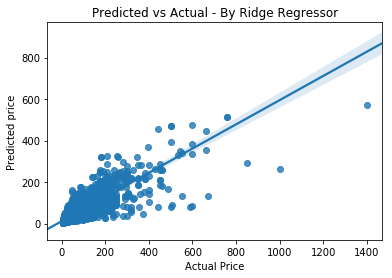

CPU times: user 6.72 s, sys: 7.95 s, total: 14.7 s
Wall time: 18.6 s


In [77]:
%%time
#####   RIDGE    ####
#rig1 = RidgeCV(alphas=np.arange(0.0001, 0.5, 0.1), cv=3)

rig1 = model_predict("Ridge Regressor", Xtr,ytr,Xte,yte, load=True)
rig1

Training set score:  0.665416432736
Test set score:  0.658866433768
Best alpha:  0.0001


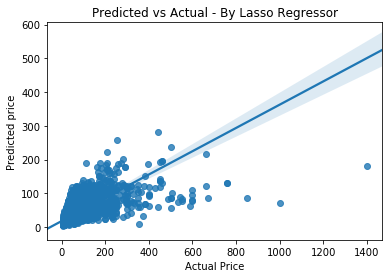

CPU times: user 6.62 s, sys: 6.65 s, total: 13.3 s
Wall time: 16.2 s


In [78]:
%%time
#####   LASSO    ####                 
#las1 = LassoCV(alphas=np.arange(0.0001, 1.0, 0.2), cv=3, random_state=179,verbose = True)
las1 = model_predict("Lasso Regressor", Xtr,ytr,Xte,yte, load=True)
las1

In [113]:
def concat_results(model1,model2,Xtr, type = 'Reg'):        # We will use this dataframe generation function to display the results
    '''Function to concatenate results from two or more regressors. Results are sorted descending and ascending and 
    column names customized.
    ===========================================================
    : model1 - list of model objects (of type regressor)
    : model2 - list of model objects (of type forests)
    : Xtr - training dataframe with column names
    : type - class of algorithm
    ===========================================================
    Returns a concatenated dataframe with sorted coefficient values'''
    
    sorted_d = pd.DataFrame()
    sorted_a = pd.DataFrame()
    if type == 'Reg':
        count = 0
        for model in model1:
            sorted_d = pd.concat([sorted_d,pd.DataFrame(data = zip(Xtr.columns,model.coef_.ravel()),
                                columns = ['features_H'+str(count),'Highest Coef'+str(count)])\
                                .nlargest(20,'Highest Coef'+str(count)).reset_index(drop = True)],axis=1)
            sorted_a = pd.concat([sorted_a,pd.DataFrame(data = zip(Xtr.columns,model.coef_.ravel()),
                                columns = ['features_L'+str(count),'Lowest Coef'+str(count)])\
                                .nsmallest(20,'Lowest Coef'+str(count)).reset_index(drop = True)],axis=1)
            count+=1
    elif type== 'Forest':
        count = 0
        for model in model2:
            sorted_d = pd.concat([sorted_d,pd.DataFrame(data = zip(Xtr.columns,model.feature_importances_),
                                columns = ['features_H'+str(count),'Highest Coef'+str(count)])\
                                  .nlargest(20,'Highest Coef'+str(count)).reset_index(drop = True)],axis=1)
            sorted_a = pd.concat([sorted_a,pd.DataFrame(data = zip(Xtr.columns,model.feature_importances_),
                                columns = ['features_L'+str(count),'Lowest Coef'+str(count)])\
                                  .nsmallest(20,'Lowest Coef'+str(count)).reset_index(drop = True)],axis=1)
            count = 1
    df = pd.concat([sorted_d,sorted_a],axis = 1)
    
    return df

def hover_color(bg_c="blue",t_c = 'yellow'):
    return dict(selector="td:hover",props=[('color', t_c),("background-color", "%s" % bg_c)])

def caption_prop(pos='top',c='blue',align = 'center'):
    return dict(selector="caption", props=[("caption-side", pos),("font-size", "150%"),('color', c),
                                           ("text-align", align)])

In [79]:
concat_results([rig1,las1],[],Xtr,type = 'Reg').style.set_caption('Ridge and Lasso feature coefficients')\
.set_table_styles([hover_color(bg_c = 'yellow',t_c='red'),caption_prop(c='blue',align='center')])

Here 0 refers to Ridge and 1 refers to Lasso. <br><br>
We can see that words such as <font color='red'>"value", "bargain", "inexpensive", "affordable", "best buy" </font> are features given negative coefficients, hence they are good predictors of low prices, which makes a lot of sense!! 
<br><br>
Although it’s expected that we will find some winery names in the top few features, but it’s quite a surprise that ALL the words in the top 10 - 20 features are names of wineries and specific regions! These are mainly French and Italian wineries and regions. In fact, we cannot find any words in the top 200 that is not related to a winery or region. This finding strongly suggests that wine prices are determined pre-dominantly by the place of production rather than the country, the province, the variety or the "quality" of the WineEnthusiast's review.<br><br>

Top wineries:  Blair, Contador, Chateau La Mission Haut-Brion, Chateau Haut-Brion, Gaja, Chateau Latour, Chateau Lafite Rothschild, Chateau Mouton Rothschild<br>
Top wine regions:  Romanee-St.-Vivant, Chevalier-Montrachet, Batard-Montrachet
<br>

Training set score:  0.743644407886
Test set score:  0.747634442871


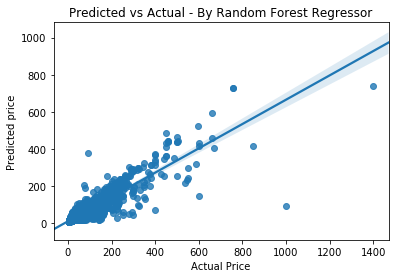

CPU times: user 2min 53s, sys: 29.9 s, total: 3min 22s
Wall time: 1min 52s


In [96]:
%%time
#####   RANDOM FOREST    ####         #### Although I would have liked to use 
#rf1 = RandomForestRegressor(n_estimators=500, criterion='mse', max_depth=20, n_jobs=5, random_state=195, verbose=1)
rfr1 = model_predict("Random Forest Regressor", Xtr,ytr,Xte,yte, load=True)
rfr1

Training set score:  0.877009192224
Test set score:  0.884338871967


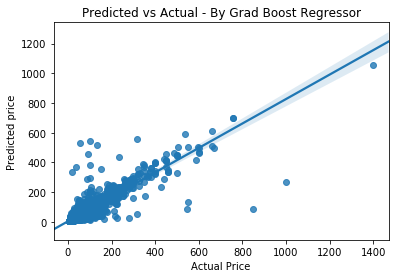

CPU times: user 11.1 s, sys: 9.11 s, total: 20.2 s
Wall time: 24.3 s


In [97]:
%%time
#####   GRAD BOOST    ####         
#gbr1 = GradientBoostingRegressor(loss='ls', learning_rate=0.8, n_estimators=60, subsample=0.8, 
#                                 criterion='friedman_mse', max_depth=20)
gbr1 = model_predict("Grad Boost Regressor", Xtr,ytr,Xte,yte, load=True)
gbr1

In [ ]:
cv = cross_val_score(gbr1,Xte,yte, cv = 3, n_jobs=5)

In [114]:
concat_results([],[rfr1,gbr1],Xtr,type = 'Forest').style.set_caption('Random Forest and Grad Boost Regressor feature coefficients')\
.set_table_styles([hover_color(bg_c = 'yellow',t_c='red'),caption_prop(c='blue',align='center')])

Here, 0 refers to Random Forest and 1 refers to Gradient Boosting. <br><br>It is interesting to find out that Random Forest and Gradient Boosting Regressors give very different top 20 features from Lasso and Ridge Regressors. While Lasso and Ridge gave names of wineries and regions as top features, Random Forest and Gradient Boosting both confirmed that <font color = 'red'>Points </font>is still the most significant predictor of Price, and Cpd sentiment score does have some impact too. <br><br> Random Forest also provided a few wine varieties that are good predictors of wine price - <font color = 'red'> Pinot Noir, Cabernet Sauvignon, Champagne and Nebbiolo. </font> We have seen in the EDA section above that Nebbiolo is one of the varieties with the highest mean wine prices, hence this result makes sense. <br><br>  Gradient Boosting Regressor has also ranked "flavor", "wine", "finish", "fruit", "cherry", "aroma", "tannin", "acidity" and "sweet" pretty high. This finding ties in with the NLTK word frequency distribution plot above where we have already seen them in the top 20 most frequent words. <br><br> <font color = 'blue'>To sum up this section, the regression models have shown that specific wineries, regions, a couple of varieties and points are positively correlated to wine prices and hence are good predictors of the higher ranges of prices. On the other hand, specific words like 'value', 'inexpensive', 'best buy' and 'bargain' are negatively correlated, and hence they are associated with the lower ranges of wine prices. If we think about it, what really determine/set the price of wines, should be famous wineries, their skill at wine-making, species of grapes, climactic conditions, techniques of fermenting, aging process, and bottling. Hence our finding makes a lot of sense, it's just unfortunate that some of these features are not included in this data set. While we should not expect the wine reviews to be important determinants of wine prices, we would have liked to find more interesting words than the above few generic words that are associated with higher priced wines. </font><br><br>
Since Gradient Boosting Regressor gives us the best accuracy score, we shall use it to predict our missing price values with the X_test dataframe. 

In [149]:
## Let's load in the wine_drop.pickle file which has the original description text that is not cleaned up and
## replace the description column in the wine sentiment scores dataframe so that we can compare with the predicted price.

desc = pd.read_pickle('wine_drop.pickle').reset_index(drop=True)
wine_drop = pd.read_pickle('wine_sentiment.pickle').reset_index(drop=True)
wine_drop.description = desc.description
wine_final = wine_drop.to_pickle('wine_final.pickle')
Y_Pred = gbr1.predict(X_test)
no_price = wine_drop[wine_drop.price.isnull()]
no_price['Predicted Price'] = np.exp(Y_Pred)
no_price.sort_values('Predicted Price',ascending = False).nlargest(20,'Predicted Price')

index  country  \
11385    11387  Germany   
29475    29477  Germany   
142673  142678   France   
107301  107304   France   
142953  142958   France   
142853  142858   France   
142674  142679   France   
54344    54346   France   
106483  106486   France   
131382  131386   France   
2433      2435   France   
2156      2158   France   
142947  142952   France   
54356    54358   France   
131394  131398   France   
106495  106498   France   
20814    20816   France   
85163    85166   France   
54650    54652   France   
106789  106792   France   

                                                                                                                                                                                                                                                                                                        description  \
11385                                         While intensely mineral from the nose to the palate, this excellent auslese is also deeply concentrated, with ripe white grapefruit, peach and yellow cherry notes. It's ripe and juicy, yet honed with a steely lemon-lime acidity and a lingering lime-zest finish.   
29475                                         While intensely mineral from the nose to the palate, this excellent auslese is also deeply concentrated, with ripe white grapefruit, peach and yellow cherry notes. It's ripe and juicy, yet honed with a steely lemon-lime acidity and a lingering lime-zest finish.   
142673                                                                      97-99 Barrel sample. A superb wine that brings together all the qualities of this vintage. It has great fruit, layers of acidity, dark tannins and a velvety texture, without losing the sense of place that sets great Bordeaux apart.   
107301                                              96-98 Barrel sample. Very dense, a muscular wine, very concentrated. It has a superb texture of velvet, while still keeping an abundance of dry tannins. There is power here, solid and dense structure, but there are also bright fruits. Vivid, concentrated.   
142953                                                                                                                94-96 Barrel sample. A fine, dry, complete wine, with all the elements in place. It is dense, with black chocolate opulence, but underlying is very pure acidity and dark plum fruit flavors.   
142853                                                                                                                                        92-94 A wine that is powerful, highly extracted and intense. The chocolate flavors and serious, dry tannins go with big, fat blackberry fruits and finishing acidity.   
142674  97-99 Barrel sample. Year after year, Margaux makes great wine simply because of its vineyard. This year, with the high proportion of Cabernet Sauvignon, the wine has stunning, ripe tannins and very pure black currant flavors, but also a denseness from the ripeness of the fruit. It's a classic a...   
54344   97-99 Barrel sample. A tasting from several barrels, because the chateau has not made the final blend, so the rating is provisional. But the wine is so rich, with an almost perfect balance of acidity and ripeness, allied to a complete purity of honeyed botrytis. However the final wine turns out,...   
106483  97-99 Barrel sample. A tasting from several barrels, because the chateau has not made the final blend, so the rating is provisional. But the wine is so rich, with an almost perfect balance of acidity and ripeness, allied to a complete purity of honeyed botrytis. However the final wine turns out,...   
131382  97-99 Barrel sample. A tasting from several barrels, because the chateau has not made the final blend, so the rating is provisional. But the wine is so rich, with an almost perfect balance of acidity and ripeness, allied to a complete purity of honeyed botrytis. However the final wine turns out,...   
2433           This 

#### Our Gradient Boosting Regressor model has predicted a wine price of \$2292 for the 2 Rieslings produced by Baron Knyphausen winery in the province of Rheingau. A quick check in our dataset shows that this winery typically produces wines which are sold for a price of ~ \$50, the range being (\$14 - \$500). Hence, <font color = 'red'>our model grossly over-predicted </font>the prices. <br><br> Looking back at its regression plot above, we can see that the majority of the points are clustered tightly to the regression line only in the range of \$0 - \$600. Hence any prices predicted above \$600, I would take it with a pinch of salt.

In [55]:
wine_drop.groupby('winery').price.describe().loc['Baron Knyphausen',:]    # Mean price shown is in log form

count    36.000000
mean      3.898613
std       0.843211
min       2.639057
25%       3.334772
50%       3.663562
75%       4.462436
max       6.234411
Name: Baron Knyphausen, dtype: float64

## <div class = "alert alert-block alert-info"> 5. Classification : High Prices, High Points and Variety</div>
---
Above, we have mixed all the words in the wine description together with all the other categorical features like country, variety, region in order to predict wine prices. Now, we just focus on the description words to see what are the important words that help distinguish high points from low points or high prices from low prices. This would also allow us to understand more about this wine text corpus.  <br><br>Hence we create new target columns called :
<font color='red'>"exorbitant" - price above \$200  <br>
 "high points" - points above 90 <br>
"isvariety" - 1. Chardonnay, 2. Pinot Noir, 3. Cabernet Sauvignon, 0. Rest</font> <br>
(due to the large no. of variety classes (632), we shall try to classify these top 3 varieties of wine first to see if we can get any logical result. Besides the fact that these 3 varieties are the top 3 in terms of numbers, they are also distinctly different in terms of colour and taste - Chardonnay being white, Pinot Noir light red, and Cabernet Sauvignon being dark red. If our classifiers cannot even tell them apart, we can forget about classifying the rest of the varieties).  <br><br> For the choice of classifiers, we will choose Logistic Regression and Random Forest to help us analyse the significance of the words. These are two very different classifiers. Logistic Regression is one of the most basic classifier and is also widely used, hence it was chosen to provide a reliable reference point for comparison with the results from Random Forest. Finally, as we are potentially dealing with imbalanced dataset, we will use random oversampling to help us improve our scores.<br><br> The number of features used in this section is not that huge, hence we can safely run the models in this section without having to pickle them.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix,accuracy_score,auc,classification_report,roc_curve

In [5]:
# Reload wine_drop dataframe with the full description text
wine_drop = pd.read_pickle('wine_drop.pickle')
wine_dprice = wine_drop.dropna(how='any', axis = 0, inplace = False)    # We will drop those rows with no actual price values
wine_dprice.price = np.log(wine_dprice.price)                           # rather than using the predicted prices
wine_dprice['exorbitant'] = 0
wine_dprice['exorbitant'] = wine_dprice.price.map(lambda x: 1 if x > 5.3 else 0)

# We will use the original dataframe for points since there are no missing values
wine_drop['highpoints'] = 0                                                 
wine_drop['highpoints'] = wine_drop.points.map(lambda x: 1 if x > 90 else 0) 

# We have a bit of an imbalanced dataset for high points, and a VERY imbalanced dataset for high prices.
print 1 - wine_drop.highpoints.sum()/float(len(wine_drop.highpoints))       
print 1 - wine_dprice.exorbitant.sum()/float(len(wine_dprice.exorbitant))   # it will be very hard to beat this baseline
                                                                             

0.786403842968
0.994352546819


In [17]:
#Let's add the top 3 common words into our stop words so that we can find more interesting words

stop_words_2 = list(stop_words.ENGLISH_STOP_WORDS) + ['wine','flavor','fruity']   

### Let's classify high prices first 

In [6]:
def concatdf(textmodel,rfcls,logcls):        # We will use this dataframe generation function to display the results
    '''Function to concatenate results from two classifiers. Results are sorted descending and ascending and 
    column names customized.
    ===================================================
    : textmodel - tfidf or count vectorizers
    : rfcls - Random Forest classifier
    : logcls - Logistic Regression classifier
    ===================================================
    Returns a concatenated dataframe features and sorted coefficients'''
    
    sorted_rf_d = pd.DataFrame(data = zip(textmodel.get_feature_names(),rfcls.feature_importances_, 
                                          logcls.coef_.ravel()),columns = ['features','RF Coef', 'Log Coef'])\
                                            .nlargest(20,'RF Coef').reset_index(drop = True)
    sorted_log_d= pd.DataFrame(data = zip(textmodel.get_feature_names(),rfcls.feature_importances_, 
                                         logcls.coef_.ravel()),columns = ['features','RF Coef', 'Log Coef'])\
                                        .nlargest(20,'Log Coef').reset_index(drop = True)
    sorted_rf_a = pd.DataFrame(data = zip(textmodel.get_feature_names(),rfcls.feature_importances_, 
                                          logcls.coef_.ravel()),columns = ['features','RF Coef', 'Log Coef'])\
                                            .nsmallest(20,'RF Coef').reset_index(drop = True)
    sorted_log_a= pd.DataFrame(data = zip(textmodel.get_feature_names(),rfcls.feature_importances_, 
                                         logcls.coef_.ravel()),columns = ['features','RF Coef', 'Log Coef'])\
                                            .nsmallest(20,'Log Coef').reset_index(drop = True)
    df = pd.concat([sorted_rf_d, sorted_log_d, sorted_rf_a, sorted_log_a],axis = 1)
    
    return df

In [60]:
# Classifying high wine prices first

X = wine_dprice.description.values
y = wine_dprice.exorbitant.values
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size = 0.2, shuffle = True, random_state= 67)
print Xtr.shape
print Xte.shape
print ytr.shape
print yte.shape

(109784,)
(27446,)
(109784,)
(27446,)


In [62]:
%%time
tfidf1 = TfidfVectorizer(sublinear_tf=True,max_df=0.6,max_features=5000, ngram_range = (1,3), stop_words=stop_words_2)
ovrsam = RandomOverSampler(ratio=1.0,random_state = 10)               
X_tr_sam,y_tr_sam = ovrsam.fit_sample(tfidf1.fit_transform(Xtr),ytr)      # We perform tfidf first then oversample 
X_te_sam = tfidf1.transform(Xte)                                          # the minority class
print Xtr.shape
print ytr.shape
print X_tr_sam.shape
print y_tr_sam.shape
print X_te_sam.shape
print Xte.shape
print np.sum(y_tr_sam==1)

(109784,)
(109784,)
(218330, 5000)
(218330,)
(27446, 5000)
(27446,)
109165
CPU times: user 38.2 s, sys: 1.18 s, total: 39.3 s
Wall time: 40.4 s


In [84]:
%%time
# Logistic Regression
logreg1 = LogisticRegression(penalty='l2',C=1000,solver='liblinear',class_weight={1:1.0, 0:1.0},n_jobs=5,random_state=34)
y_pred_cls = logreg1.fit(X_tr_sam,y_tr_sam).predict(X_te_sam)
y_score_cls =logreg1.score(X_te_sam,yte)
print 'Training set score: ', logreg1.score(X_tr_sam,y_tr_sam)
print 'Test set score: ',y_score_cls
print confusion_matrix(yte,y_pred_cls, labels=[1,0])
print classification_report(yte,y_pred_cls)

Training set score:  1.0
Test set score:  0.994133935728
[[   93    63]
 [   98 27192]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     27290
          1       0.49      0.60      0.54       156

avg / total       0.99      0.99      0.99     27446

CPU times: user 4.97 s, sys: 64.7 ms, total: 5.04 s
Wall time: 5.06 s


In [87]:
%%time
# Random forest

rfc1 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=30, class_weight={1:1.0, 0:1.0},n_jobs=5, 
                              random_state=153, verbose=1)

y_pred_cls = rfc1.fit(X_tr_sam,y_tr_sam).predict(X_te_sam)
y_score_cls =rfc1.score(X_te_sam,yte)
print 'Training set score: ', rfc1.score(X_tr_sam,y_tr_sam)
print 'Test set score: ',y_score_cls
print confusion_matrix(yte,y_pred_cls, labels=[1,0])
print classification_report(yte,y_pred_cls)

Training set score:  0.99723354555
Test set score:  0.993806019092
[[   85    71]
 [   99 27191]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     27290
          1       0.46      0.54      0.50       156

avg / total       0.99      0.99      0.99     27446

CPU times: user 3min 1s, sys: 2.03 s, total: 3min 3s
Wall time: 55.8 s


In [88]:
concatdf(tfidf1,rfc1,logreg1)          # Classifying high wine prices

features   RF Coef   Log Coef              features   RF Coef  \
0          years  0.026722  17.228041             smoky new  0.000177   
1         cherry  0.019579  -9.565238                  brut  0.000002   
2            age  0.016891  19.260278                  airy  0.000199   
3          aging  0.014740  20.993454                  clos  0.000252   
4           long  0.014257  25.616334                shaped  0.002285   
5        flavors  0.013336   6.336480  beautifully balanced  0.000331   
6          drink  0.012805  19.231780             crisp red  0.000175   
7       powerful  0.012615  17.936917            green bean  0.000053   
8          blend  0.012198 -15.994942               bottled  0.000207   
9           rich  0.010242  -0.348546               defines  0.000638   
10  concentrated  0.010231  13.387036         earthy aromas  0.000099   
11       opulent  0.009730  27.262772                 pruny  0.000091   
12       tannins  0.009437   9.950899        dried apricots  0.002060   
13       vintage  0.009232  12.635354                darkly  0.000317   
14         pinot  0.009139 -10.152886                 punch  0.000240   
15        finish  0.009050   0.458688             australia  0.000088   
16          good  0.008683  -5.408522                 leave  0.000280   
17          nose  0.008570   1.591611                choppy  0.000039   
18           dry  0.008530  -0.863460           orange rind  0.000545   
19         great  0.008340  11.970404                 bears  0.000090   

     Log Coef            features  RF Coef   Log Coef          features  \
0   41.725646  000 cases produced      0.0  -3.052280     smoky new oak   
1   38.485976                  06      0.0  -1.187847              cuva   
2   38.057551           18 months      0.0  -1.837808   ripe strawberry   
3   37.988951                 3a5      0.0  -8.190929         austerity   
4   36.408600                  45      0.0  -1.752989             lends   
5   34.213988            50 blend      0.0  -0.221926                du   
6   34.127231                  65      0.0  -7.504037               cab   
7   34.077281                  75      0.0  -4.827662            butter   
8   33.963017              abound      0.0  -2.636056        selections   
9   33.800786            abundant      0.0  -4.343784            barrel   
10  33.265944       accompaniment      0.0  -0.772202     apricot honey   
11  32.973649        acid balance      0.0  -8.125994  blackberry fruit   
12  32.413044    acidity finishes      0.0  -2.785952  aftertaste drink   
13  32.359148     acidity framing      0.0  -0.266771          screwcap   
14  32.201753       acidity light      0.0   2.975051            chards   
15  32.149739       acidity makes      0.0 -16.156282    flavors finish   
16  32.001943        acidity soft      0.0  -9.319770          bordeaux   
17  31.476454       acidity touch      0.0  -7.597725        dry finish   
18  31.302480            adequate      0.0  -8.618848           chablis   
19  31.247976           admirable      0.0  -1.999640             tangy   

         RF Coef   Log Coef  
0   0.000000e+00 -33.014948  
1   5.119190e-06 -32.332386  
2   2.631705e-07 -29.856691  
3   1.640018e-06 -28.214959  
4   3.609539e-06 -27.441427  
5   3.743195e-06 -27.406630  
6   2.037581e-03 -26.801099  
7   2.169934e-05 -26.345728  
8   6.165704e-06 -25.901697  
9   1.562914e-03 -25.829137  
10  3.622654e-06 -24.533756  
11  2.928985e-05 -24.393648  
12  5.936667e-06 -23.654161  
13  5.726576e-05 -23.553897  
14  3.440800e-06 -23.459868  
15  3.354626e-05 -23.453206  
16  9.153473e-04 -23.412608  
17  1.087243e-06 -23.356672  
18  1.319846e-05 -23.345572  
19  2.093142e-04 -23.297924

### Words associated with high price:<br>
<font color='red'>
years, cherry, aging, age, powerful, blend, long, vintage, tannins, pinot, clean, concentrated, fruit, rich, drink, long, flavors, opulent, great, beautifully balanced</font>
<br>

Both Logistic Regression and Random Forest only managed to give an optimised F1 score of around 0.5 for class Label 1, this is even after using oversampling to balance the classes. More interestingly, although the F1 score for label 1 is about the same, they gave very different top 20 highest coefficient words. This list is quite consistent regardless of how I try to optimise the hyperparameters. 

Also we note that even though we have used ngram = 3, we do not see many 2- or 3-words phrases being ranked highly. 


### Now for high points

In [89]:
# Classifying high points. Let's create the features and target dataframes and then train-test-split

X = wine_drop.description.values
y = wine_drop.highpoints.values
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size = 0.2, shuffle = True, random_state= 67)
print Xtr.shape
print Xte.shape
print ytr.shape
print yte.shape

(120740,)
(30185,)
(120740,)
(30185,)


In [90]:
%%time
tfidf2 = TfidfVectorizer(sublinear_tf=True,max_df=0.6,max_features=5000, ngram_range = (1,3), stop_words=stop_words_2)
ovrsam = RandomOverSampler(ratio=1.0,random_state = 10)
X_tr_sam,y_tr_sam = ovrsam.fit_sample(tfidf2.fit_transform(Xtr),ytr)
X_te_sam = tfidf2.transform(Xte)
print Xtr.shape
print ytr.shape
print X_tr_sam.shape
print y_tr_sam.shape
print X_te_sam.shape
print Xte.shape
print np.sum(y_tr_sam==1)

(120740,)
(120740,)
(190178, 5000)
(190178,)
(30185, 5000)
(30185,)
95089
CPU times: user 39.5 s, sys: 1.18 s, total: 40.7 s
Wall time: 40.9 s


In [92]:
from sklearn.metrics import f1_score,recall_score

def opt_logcls(Xtr,ytr,Xte,yte):
    '''Function to help find the optimum class weights for logistic regression when data set is imbalanced.
    =============================================================
    :Xtr - Training features
    :ytr - Training label 
    :Xte - Test features 
    :yte - Test label 
    =============================================================
    Returns - Plot of F1 and Recall scores of class label 1 and 0 with optimum point indicated by maximun F1 score of 
    class label 1'''
    
    s,t,u,v,x = [],[],[],[],[]
    for i in np.linspace(0,1,11):
        x.append(i)
        y_pred_cls= LogisticRegression(penalty='l2',C=1000,solver='liblinear',class_weight={1:i, 0:1-i},
                                       n_jobs=5,random_state=34).fit(Xtr,ytr).predict(Xte)
        s.append( f1_score(yte,y_pred_cls, pos_label=0))
        t.append(recall_score(yte,y_pred_cls,pos_label=0))
        u.append(f1_score(yte,y_pred_cls, pos_label=1))
        v.append( recall_score(yte,y_pred_cls,pos_label=1))
    plt.subplots(figsize=(10,6))
    plt.plot(x,s,'r-' )
    plt.plot(x,t,'r--')
    plt.plot(x,u,'b-' )
    plt.plot(x,v,'b--' )
    plt.vlines(x[np.argmax(u)],0,1,colors=u'k', linestyles=u'dotted')
    plt.legend(['F1 Label 0', 'Recall Label 0', 'F1 Label 1', 'Recall Label 1'], loc='upper left')
    plt.xlabel('Class weights')
    plt.ylabel('Scores')
    plt.show()

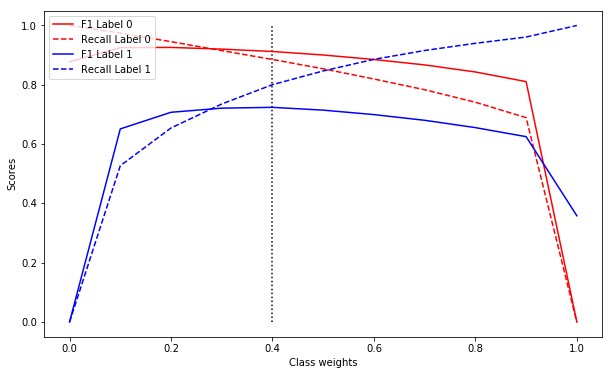

CPU times: user 1min 12s, sys: 622 ms, total: 1min 12s
Wall time: 1min 13s


In [93]:
%%time
opt_logcls(X_tr_sam,y_tr_sam,X_te_sam,yte)

In [94]:
%%time
# Logistic Regression
logreg2 = LogisticRegression(penalty='l2',C=1000,solver='liblinear',class_weight={1:0.4, 0:0.6},n_jobs=5,random_state=34)
y_pred_cls = logreg2.fit(X_tr_sam,y_tr_sam).predict(X_te_sam)
y_score_cls =logreg2.score(X_te_sam,yte)
print 'Training set score: ', logreg2.score(X_tr_sam,y_tr_sam)
print 'Test set score: ',y_score_cls
print confusion_matrix(yte,y_pred_cls, labels=[1,0])
print classification_report(yte,y_pred_cls)

Training set score:  0.877709303915
Test set score:  0.866755010767
[[ 5271  1315]
 [ 2707 20892]]
             precision    recall  f1-score   support

          0       0.94      0.89      0.91     23599
          1       0.66      0.80      0.72      6586

avg / total       0.88      0.87      0.87     30185

CPU times: user 8.5 s, sys: 232 ms, total: 8.74 s
Wall time: 8.83 s


In [95]:
%%time
# Random forest

rfc2 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=30, class_weight={1:0.9, 0:0.8},n_jobs=5, 
                              random_state=155, verbose=1)

y_pred_cls = rfc2.fit(X_tr_sam,y_tr_sam).predict(X_te_sam)
y_score_cls =rfc2.score(X_te_sam,yte)
print 'Training set score: ', rfc2.score(X_tr_sam,y_tr_sam)
print 'Test set score: ',y_score_cls
print confusion_matrix(yte,y_pred_cls, labels=[1,0])
print classification_report(yte,y_pred_cls)

Training set score:  0.897501288267
Test set score:  0.821301971178
[[ 5665   921]
 [ 4473 19126]]
             precision    recall  f1-score   support

          0       0.95      0.81      0.88     23599
          1       0.56      0.86      0.68      6586

avg / total       0.87      0.82      0.83     30185

CPU times: user 5min 31s, sys: 2.33 s, total: 5min 33s
Wall time: 1min 32s


In [96]:
concatdf(tfidf2,rfc2,logreg2)          # Classifying high points

features   RF Coef   Log Coef                features   RF Coef  \
0     flavors  0.038047  -0.409838                nacional  0.000009   
1       years  0.031021   8.224506                   90 92  0.000893   
2        rich  0.017234   5.658891              pinot noir  0.000378   
3      aromas  0.017079  -0.415615                   92 94  0.000376   
4     complex  0.015262   7.246222           russian river  0.000023   
5        long  0.015178   6.027093            barbera asti  0.000005   
6        easy  0.012269  -2.528917              mourva dre  0.000053   
7      simple  0.012207 -10.401393                 stopper  0.000036   
8    vineyard  0.012056   5.024982                    2022  0.000087   
9         age  0.011845   3.905108  golden delicious apple  0.000082   
10     finish  0.011731   0.318403            petit verdot  0.000412   
11  beautiful  0.011085  10.528833           barrel sample  0.005455   
12      light  0.010251  -2.119420                nowa2020  0.000101   
13     cherry  0.009892   2.330309               3a4 years  0.000277   
14       soft  0.009792  -0.186805              cough drop  0.000000   
15        dry  0.009278   0.324825               2a3 years  0.000387   
16      black  0.009157   5.489998            pinot grigio  0.000087   
17   powerful  0.009152   7.008770                gorgeous  0.003970   
18  delicious  0.009039   7.076884                    2025  0.000112   
19      great  0.008870   7.056050              semi sweet  0.000006   

     Log Coef                features       RF Coef   Log Coef  \
0   25.993319              cough drop  0.000000e+00  12.587708   
1   24.321483            sweet sugary  0.000000e+00 -14.446961   
2   18.882119                    talc  0.000000e+00   1.443611   
3   18.574750          flavors simple  1.298529e-10  -0.098913   
4   17.989144             fruit melon  2.141651e-08   2.773715   
5   17.377598  buttered toast caramel  4.868516e-08  -0.684598   
6   17.245458                   pinch  1.707937e-07  -1.135183   
7   15.713139          good mouthfeel  2.342566e-07   0.953141   
8   15.323226              borderline  2.455213e-07   2.347451   
9   15.063514      lemon lime acidity  2.617725e-07   1.187329   
10  14.417306           apple vanilla  2.892333e-07  -3.965296   
11  14.308638                  celery  3.153607e-07   1.973523   
12  13.706323              tastes bit  3.417254e-07   1.423189   
13  13.354063               lifesaver  3.550501e-07  -6.239585   
14  12.587708           weight palate  3.651281e-07  -1.934051   
15  12.043099               make good  3.950865e-07  -0.898408   
16  11.959412              sweet like  4.231976e-07   2.372422   
17  11.806436               add depth  4.975621e-07  -2.448246   
18  11.510305                  lactic  5.140780e-07  -5.015484   
19  11.396276           currants dark  5.582356e-07  -8.039019   

             features       RF Coef   Log Coef  
0            rosso di  1.731139e-05 -25.430886  
1            everyday  1.438620e-03 -22.198831  
2           light red  3.242470e-06 -22.198821  
3    touriga nacional  1.661102e-05 -21.824439  
4              watery  5.676639e-06 -21.391966  
5   dry medium bodied  1.974800e-06 -20.966213  
6        pasta dishes  5.025009e-06 -20.218991  
7        sugary sweet  7.020337e-07 -19.717736  
8            informal  1.162230e-05 -19.494962  
9                asti  3.816973e-05 -19.297837  
10              viura  3.277097e-06 -18.487211  
11            grating  9.902507e-07 -17.103229  
12             grigio  1.427245e-04 -17.031501  
13              cough  4.858955e-06 -16.777505  
14              pruny  2.696343e-06 -16.630729  
15              weedy  4.109733e-06 -16.295029  
16         fresh easy  4.413836e-06 -16.086796  
17            russian  1.820958e-05 -16.046523  
18               noir  4.762975e-04 -15.668066  
19                 88  3.657393e-04 -15.565822


### Words associated with high points:<br>
<font color='red'>
flavors, years, rich, aromas, complex, long, age, simple, powerful, beautiful, great, delicious, gorgeous</font>
<br>

Again the top 10 words provided by Logistic Regression and Random Forest are very different, even though both provided F1 scores of ~ 0.7 for class Label 1, which is not a bad result. It could be because Logistic Regression and Random Forest use totally different approaches to classifying. Logistic regression relies on the sigmoid function to generate probabilities between 0 and 1, while random forest splits features in a rectilinear manner with the goal of providing higher purity with regards to the label. Their decision boundaries are hence drawn differently.
<br>
And again, we do not see many 2- or 3-words phrases being ranked highly. 


### Now to classify wine varieties

In [29]:
wine_drop['isvariety'] = wine_drop.variety.map(lambda x: 1 if x=="Chardonnay" else 2 if x=="Pinot Noir" else 3 if
                                               x =="Cabernet Sauvignon" else 0)
wine_drop.description = wine_drop.description.str.replace('Chardonnay', '') ## Remove the names of these varieties
wine_drop.description = wine_drop.description.str.replace('Pinot Noir','')  ## from the review text to prevent leakage 
wine_drop.description = wine_drop.description.str.replace('Cabernet Sauvignon','')
wine_drop.isvariety.value_counts()

0    109355
1     14482
2     14288
3     12800
Name: isvariety, dtype: int64

In [24]:
X = wine_drop.description.values
y = wine_drop.isvariety.values
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size = 0.2, shuffle = True, random_state= 67)
print Xtr.shape
print Xte.shape
print ytr.shape
print yte.shape

(120740,)
(30185,)
(120740,)
(30185,)


In [25]:
tfidf3 = TfidfVectorizer(sublinear_tf=True,max_df=0.6,max_features=5000, ngram_range = (1,3), stop_words=stop_words_2)
ovrsam = RandomOverSampler(ratio=1.0,random_state = 10)
X_tr_sam,y_tr_sam = ovrsam.fit_sample(tfidf3.fit_transform(Xtr),ytr)
X_te_sam = tfidf3.transform(Xte)
print Xtr.shape
print ytr.shape
print X_tr_sam.shape
print y_tr_sam.shape
print X_te_sam.shape
print Xte.shape
print np.sum(y_tr_sam==1), np.sum(y_tr_sam==2),np.sum(y_tr_sam==3)

(120740,)
(120740,)
(349848, 5000)
(349848,)
(30185, 5000)
(30185,)
87462 87462 87462


In [26]:
%%time
# Logistic Regression
logreg3 = LogisticRegression(penalty='l2',C=1000,solver='liblinear',n_jobs=5,random_state=34)
y_pred_cls = logreg3.fit(X_tr_sam,y_tr_sam).predict(X_te_sam)
y_score_cls =logreg3.score(X_te_sam,yte)
print 'Training set score: ', logreg3.score(X_tr_sam,y_tr_sam)
print 'Test set score: ',y_score_cls
print confusion_matrix(yte,y_pred_cls, labels=[0,1,2,3])
print classification_report(yte,y_pred_cls)

Training set score:  0.926439482289
Test set score:  0.800397548451
[[16846  1562  1500  1985]
 [  231  2622    23    12]
 [  209    28  2506    97]
 [  261    12   105  2186]]
             precision    recall  f1-score   support

          0       0.96      0.77      0.85     21893
          1       0.62      0.91      0.74      2888
          2       0.61      0.88      0.72      2840
          3       0.51      0.85      0.64      2564

avg / total       0.86      0.80      0.81     30185

CPU times: user 1min 58s, sys: 2.57 s, total: 2min 1s
Wall time: 2min 6s


In [27]:
%%time
# Random forest

rfc3 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=30,n_jobs=5, 
                              random_state=159, verbose=1)

y_pred_cls = rfc3.fit(X_tr_sam,y_tr_sam).predict(X_te_sam)
y_score_cls =rfc3.score(X_te_sam,yte)
print 'Training set score: ', rfc3.score(X_tr_sam,y_tr_sam)
print 'Test set score: ',y_score_cls
print confusion_matrix(yte,y_pred_cls, labels=[0,1,2,3])
print classification_report(yte,y_pred_cls)

Training set score:  0.897492625369
Test set score:  0.724763955607
[[14494  3559  2147  1693]
 [  137  2744     7     0]
 [  221    50  2514    55]
 [  257    28   154  2125]]
             precision    recall  f1-score   support

          0       0.96      0.66      0.78     21893
          1       0.43      0.95      0.59      2888
          2       0.52      0.89      0.66      2840
          3       0.55      0.83      0.66      2564

avg / total       0.83      0.72      0.74     30185

CPU times: user 12min 35s, sys: 6.98 s, total: 12min 42s
Wall time: 3min 54s


In [28]:
concatdf(tfidf3,rfc3,logreg3)          # Classifying variety

features   RF Coef   Log Coef       features   RF Coef   Log Coef  \
0       cabernet  0.045382 -21.894378    pinot blanc  0.000127  51.376615   
1         cherry  0.033789  -3.872106        barbera  0.000359  41.922525   
2      pineapple  0.030401  -2.904668         barolo  0.000136  40.915975   
3            cab  0.026463 -25.043669       brunello  0.000148  40.090405   
4          pinot  0.025793 -20.629438       prosecco  0.000339  39.223478   
5         cassis  0.024806  -5.884167       pinotage  0.000002  38.213454   
6        tannins  0.022642  -0.894900       malvasia  0.000021  37.611405   
7     blackberry  0.022491   2.195564         chenin  0.000090  36.935753   
8           pear  0.019882   0.561804        amarone  0.000047  36.026438   
9           cola  0.019648  -3.596740         petite  0.000307  35.773526   
10         apple  0.018470  -4.772479       nebbiolo  0.000011  35.074206   
11      cherries  0.016446  -2.198349       garnacha  0.000022  34.880484   
12         silky  0.014366  -4.576584       semillon  0.000007  34.160463   
13         peach  0.012975   0.350174        verdejo  0.000026  34.125965   
14  blackberries  0.012432   1.745360          viura  0.000020  34.001920   
15         black  0.011667   3.949059     barbaresco  0.000008  33.664065   
16      tropical  0.010997  -3.914708        ripasso  0.000043  33.645427   
17        citrus  0.010784   0.674041      sauvignon  0.003172  32.944225   
18     raspberry  0.010111  -1.648506       dolcetto  0.000002  32.187969   
19           red  0.010059   5.259780  montepulciano  0.000009  32.088084   

                  features       RF Coef   Log Coef               features  \
0          christmas spice  3.515175e-09   1.096448                 verdot   
1                90 barrel  5.567312e-09   2.204951           petite sirah   
2                    89 91  8.753331e-09   5.799412  merlot cabernet franc   
3         91 barrel sample  1.405130e-08   3.103621                    cab   
4                      wax  9.573330e-08   1.758656               ma lange   
5             rich velvety  1.826952e-07   1.981432               cabernet   
6                 scorched  2.269554e-07  -3.148566                  chard   
7             palate doles  2.875315e-07  24.922453      dry medium bodied   
8          grenache mourva  3.312071e-07   2.892953                  pinot   
9                92 barrel  3.594023e-07   6.106431                 rha ne   
10            tuscan blend  3.632128e-07  13.638342                     92   
11  immediately attractive  3.898461e-07  -0.745369                chablis   
12              inky black  4.314717e-07  -0.157449           syrah merlot   
13            blue flowers  4.498434e-07  23.529525            percentages   
14            grilled herb  4.552804e-07   5.991203            bell pepper   
15               93 barrel  4.557434e-07   2.578987          good cabernet   
16                   break  4.876371e-07   0.575922             mourva dre   
17            89 91 barrel  5.167151e-07   3.103621                 pinots   
18        blend nero avola  5.168464e-07   0.482799                 chards   
19                piedmont  5.968917e-07   4.835080          merlot malbec   

     RF Coef   Log Coef  
0   0.000279 -33.028059  
1   0.000328 -28.751422  
2   0.000076 -26.316296  
3   0.026463 -25.043669  
4   0.000018 -22.024922  
5   0.045382 -21.894378  
6   0.010045 -21.863357  
7   0.000008 -21.705447  
8   0.025793 -20.629438  
9   0.000106 -20.296671  
10  0.000065 -19.082878  
11  0.000994 -18.934591  
12  0.000019 -17.611430  
13  0.000031 -17.584448  
14  0.000067 -17.197528  
15  0.000144 -16.852785  
16  0.000121 -16.631040  
17  0.003521 -15.957966  
18  0.000670 -15.822303  
19  0.000027 -15.466310

### Classification summary:

Random Forest returned a list of fruit-related words as being associated with the 3 varieties of wine - <font color='red'>"cherry", "pineapple", "cassis", "tannins", "blackberry", "pear", "cola", "apple", "silky", "peach" </font>while <br>
Logistic Regression gave a list of names of other wine varieties such as <font color='red'>"pinot blanc","barbera", "barolo", "brunello", "prosecco", "pinotage", "malvasia", "chenin", "amarone", "petite", "nebbiolo", "garnacha", "semillon", "verdejo" </font>   

A very ripe Chardonnay will have flavors more towards tropical fruits like pineapple, guava and mango. A barely ripe Chardonnay will have green apple, pear or lemon flavors.<br><br>
Pinot Noir derives its lighter color from red-fruits such as cherry, cranberry and strawberry while Cabernet Sauvignon derives its dark color from dark fruits such as blackcurrant and blackberry.<br><br>
Although Pinot Blanc is top of the list returned by Logistic Regression, it should not be confused with Pinot Noir, because they are different grapes. Pinot Noir is a black wine grape with green flesh, while Pinot Blanc is a white grape that is often confused with Chardonnay. Pinot Blanc is very similar to a Chardonnay in that it has a medium to full body and light flavor. Its lighter flavors often include citrus, melon, pear, apricot, and perhaps smokey or mineral undertones.<br><br>
<font color='blue'>Although the classification scores by Logistic Regression and Random Forest are not that poor, I still feel that the data present in this dataset is not sufficient for the models to classify wine varieties with high accuracy and precision. Just based on review text, the models are only able to draw vague relationships to fruits and similarity with other varieties at best. If we consider all the factors affecting the varieties of wine, we will understand why this data-set is lacking in a lot of information:<br><br>

1. Many of the varieties are close relations of one another in terms of genealogy (e.g. Pinot Noir, Pinot Grigio, Pinot Blanc), but yet they have very different colors and properties. They may be grown in the same region, but may also be cultivated in other geographically very different regions.<br><br>

2. Nearly all the varieties can have different flavors of fruits as a result of different degrees or process of aging. Genealogically different species of grapes like Chardonnay and Pinot Blanc can thus have similar citrus, or pear flavors depending on their age.<br><br>

3. Due to historical and geographical reasons, some of the names of grapes or their corresponding wines can be different depending on the country of origin. For example, in France, it's called Pinot Gris, while in Italy it's called Pinot Grigio. They are in fact the same grape, just grown in different places. Another example is Pinot Blanc in France, and it's called Pinot Bianco in Italy. Without explicitly declaring such naming differences in the dataset, models will always mix them up. <br><br>

4. Some of the varieties can be so close in taste, scent and color that even domain experts themselves cannot tell apart. In such cases, only minute chemical property differences or even isotopic distribution differences can differentiate them. This means that only if we can somehow get those chemical and physical properties data for the wine varieties in this data-set to supplement this review and geo-location data, can we have more confidence in getting the model to classify varieties more accurately. <br><br>

5. Due to subtle differences in climate conditions, the quality of harvest of a particular grape variety in one year, could be slightly different from another year. This may be reflected in the flavor or undertone of the final wine product. Hence, the domain expert may be able to detect such subtle differences in a blind tasting session, but on consultation with the wine producer and getting more information about the harvests, he may then understand why they are actually from the same grape. Such harvest data is not collected in the data-set, but is still an important factor in classifying wine variety.</font>

<br>Lastly, from above, we take particular note that our Random Forest classifier has clearly <font color='red'>identified "years", "age", "rich", "long" and "powerful" </font> as distinctive words that associate with high points AND high prices. This makes a lot of sense as it's common knowledge that wines cost higher, taste better, and valued more as they age with time.

### <div class = "alert alert-block alert-info"> ** 6. Word2vec model analysis on the semantic relationships and contextual information of the text** </div>
---
Word2Vec is a class of neural network models that produces a vector for each word in the corpus that encodes its semantic information in an unsupervised manner. We have used TFIDF for word representation above, its scores give us some idea of a word's relative importance in a document, but they do not give any insight into its semantic meaning.<br><br>We can use Word2Vec’s models to help us measure the semantic similarity between words by computing the cosine similarity between their corresponding vectors. In particular we will use the <font color='red'>Continuous Bag-of-words and Skip-gram models</font> to help us understand more about our wine text corpus. <br><br> The <font color='red'>Continuous Bag-of-words </font> model takes in as inputs n words before and n words after a particular word, and tries to predict this particular word. Hence it is <font color='red'>predicting the word given its context.</font> <br><br> As for the <font color='red'>Skip-gram model</font>, it takes in a particular word as the input, and tries to <font color='red'>predict its context</font>, i.e. n words before and n words after this particular word.

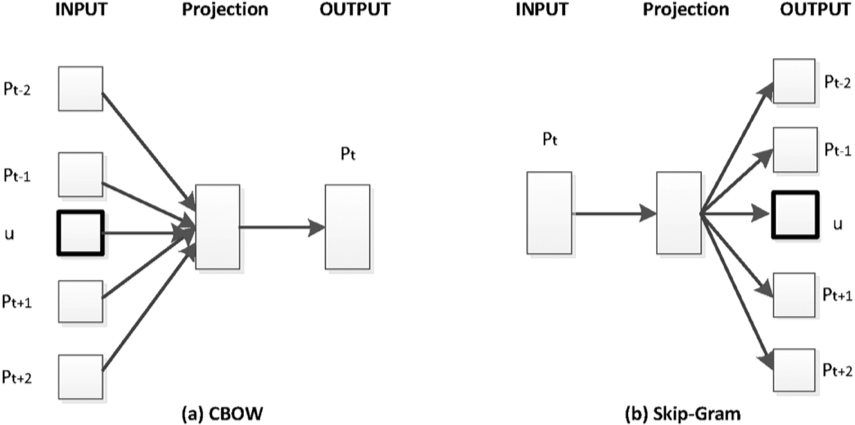

In [10]:
from gensim import models,similarities
import gensim

This non-commercial license of GraphLab Create for academic use is assigned to bernt73@gmail.com and will expire on October 17, 2018.


In [11]:
#cbowmodel = models.Word2Vec(token_corpus,min_count=2,negative = 5, sample=0.0005, window=3, size = 2000, sg=0)
cbowmodel = models.Word2Vec.load('cbow2')

#sgmodel = models.Word2Vec(token_corpus,min_count=2,negative = 5, sample=0.0005, window=3, size = 2000, sg=1)
sgmodel= models.Word2Vec.load('sg2')

### Both cbow and skip-gram models have a predict_output_word method that can provide us with some insights with regards to the context surrounding particular word(s) of our interest. Below, we try to get cbow and skip-gram to tell us the most likely output word associated with the valley that albarino (a variety of white wine) is grown. 

In [78]:
print pd.DataFrame(cbowmodel.predict_output_word(['which','valley','albarino','grown'], topn=10),columns = ['word', 'w_p'])

        word       w_p
0     sonoma  0.004720
1     county  0.003728
2       napa  0.003502
3  alexander  0.003129
4     yakima  0.003115
5   southern  0.002691
6      grown  0.002677
7      coast  0.002266
8       edna  0.002070
9      creek  0.002020


In [14]:
print pd.DataFrame(sgmodel.predict_output_word(['which','valley','albarino','grown'], topn=10),columns = ['word', 'w_p'])

         word       w_p
0       grape  0.000424
1       santa  0.000355
2      sonoma  0.000349
3       grown  0.000348
4        vine  0.000343
5       loire  0.000343
6        napa  0.000339
7  willamette  0.000337
8    southern  0.000337
9   alexander  0.000330


#### We can see that both cbow and skip-gram give us <font color = 'red'>Sonoma and Napa </font> in the top 10 most likely words, which is very logical actually. A search online shows that Sonoma is a place in California, very close to Napa valley which is a well known wine-producing region in US. Albarino wines are produced there indeed! This result gives us quite a bit of confidence on the Word2vec model to give us contextual insights of the wine text. <br><br> Next we shall give a list of words to the models to generate the most similar words to each of them.

In [12]:
### Function for displaying word similarity results in an integrated dataframe

def create_resultdf(wordlist, model, header):
    '''Function to concatenate multiple columns of similar words with probability results from word2vec model.
    =================================================================
    : wordlist - list of words to find most similar words
    : model - Object instance of language model
    : header - text string of model name
    =================================================================
    Returns a concatenated dataframe of similar words with their respective probabilities'''
    
    comb_df = pd.DataFrame()
    for word in wordlist:
        globals()[header+'_simi_%s_w' %word] = []
        globals()[header+'_simi_%s_p' %word] = []
        for i in range(len(model.most_similar(word))):
            globals()[header+'_simi_%s_w' %word].append(unidec(model.most_similar(word)[i][0]))
            globals()[header+'_simi_%s_p' %word].append(model.most_similar(word)[i][1])

        df = pd.DataFrame(data = zip(globals()[header+'_simi_%s_w' %word],globals()[header+'_simi_%s_p' %word]),columns = [word, word+'p'])
        comb_df = pd.concat([comb_df,df], axis = 1)
     
    return comb_df

In [16]:
test_words = ['aroma', 'taste', 'price','flora', 'potential', 'chardonnay', 'cabernet', 'steak', 'flavor']
cbow_comb_df = create_resultdf (test_words, cbowmodel, 'cbow')
cbow_comb_df.style.set_caption('cbowmodel word similarity').set_table_styles([hover_color(bg_c = 'yellow',t_c='red'),caption_prop(c='blue',align='center')])

In [14]:
sg_comb_df = create_resultdf (test_words, sgmodel, 'sg')
sg_comb_df.style.set_caption('sgmodel word similarity').set_table_styles([hover_color(bg_c = 'yellow',t_c='red'),caption_prop(c='blue',align='center')])

<img src = 'https://excellenceresorts.files.wordpress.com/2013/11/er_wine-chart.jpg' style="width: 600px;">

#### <div class = "alert alert-block alert-warning">From the results dataframes, i'm pleased to find that both models can return very logical, and similar words to "aroma", "taste", "price", "promise", and "steak". They are able to associate: <br><br>"scent" -> "aroma" <br> "sugary" -> "taste" <br> "dollar" -> "price" <br> "promise" -> "potential" <br> "chop" -> "steak" <br><br> As for the wine varieties of chardonnay (white) and cabernet (red), the models are able to return :<br><font color = "green" >white wines related names such as "albarino", "blanc", "grigio", "gris", "semillon", "riesling" for chardonnay</font> and <br><br><font color = "red" >red wines related names such as "merlot", "syrah", "claret", "malbec" and "sauvignon" for cabernet.</font><br><br> From the above results, I believe that Word2Vec is quite useful in capturing contextual information surrounding a given word.</div>

## <div class="alert alert-block alert-info"> <font color='purple'>7. Building a text generative model</font></div>
---

From the Regression models, we have understood that specific <font color='red'>wineries, wine-producing regions and Points </font>are the major features in predicting wine prices. Sentiment scores of wine reviews have little to no impact on wine price. VADER has also confirmed that the sentiment range of the review text is quite narrow.

The Classification models informed us that the words <font color='red'>"years", "age", "rich", "long" and "powerful"</font> are more likely to appear in reviews for highly rated and priced wines. 

As for the Word2Vec models, we have seen that they are <font color='red'>able to extract contextual information of words and group the names of wines according to their colour.</font> 

It is now pretty obvious that this wine review text corpus is a rich source of information on its own, and does have some predictive value towards wine prices and points as shown by the regression and classification models, albeit mainly for the lower prices. We should extract more creative value out of it than just using it to regress prices and classify variety. Let's start to think about how to use this corpus to build a text generative model. <br><br>We have noted that the text in this corpus is pretty clean, with simple sentence structures, little to no connection between sentences in each document and hence little long-term dependencies and a narrow sentiment range. While the Word2Vec models do provide a rich source of contextual information, <font color='red'>Character level training </font>is much easier to understand and visualise as compared to word embeddings as it only involves encoding all the possible character classes that we wish to represent, into Ascii codes followed by one-hot vectors. Converting back the predicted one-hot vectors back to Ascii code and their respective character class is equally straightforward. In addition to its simplicity, because our goal is to try to generate complete sentences of wine reviews, we need to <font color='red'>take care of punctuations </font>as well. Word2Vec captures contextual information very well, but it doesn't handle punctuations.

Now, we shall create a <font color='red'>Recurrent Neural Net using Tensorflow</font> to take our characters as input in a sequence, and predict the next character at the end of that sequence. Recurrent Neural Nets are particularly designed to work with sequence dependent data (like our text character sequence). The backpropagation training step of RNNs is notoriously hard, mainly due to the exploding or vanishing gradients issues. In order to minimize the possibility of them occurring, we shall be using a type of RNN cell called Gated Recurrent Unit, with Relu as the activation function instead of the default tanh, since they are known to help resolve these gradient issues



### Wine text corpus stats : <br>
1. Number of documents = 150925<br>
2. Total number of words = 6066350 <br> 
3. Total number of characters ~ 36 M<br>
4. Total number of sequences ~ 1.2 M (Based on sequence length 30, batch size 50)<br>
5. Total number of batches ~ 24000<br>
6. Total Number of character classes = 98

## Some considerations when building a generative model:

### 1. CNN or RNN
RNN for time dependent or sequence dependent data <br>
CNN for spatial dependent data <br>
<br>
### 2. But isn’t RNN hard to train due to vanishing gradient problem?
Solutions: <br>
a) ReLU over Sigmoid or Tanh<br>
b) Gated / LSTMs over vanilla RNN <br>
<br>
### 3. Character or word embeddings level training
Depends on the text corpus : <br>
    a) Character - If simple structure, with clean characters, small vocabulary and little long-term dependencies <br>
    b) Word embeddings - If complex sentence structure and wish to preserve semantics<br>
<br>
### 4.  Tensorflow or Keras
Depends on personal preference<br>
In tensorflow, have to be very careful with the feed_dict and all datatypes are represented in tensor forms.

## $$Gated Recurrent Unit$$

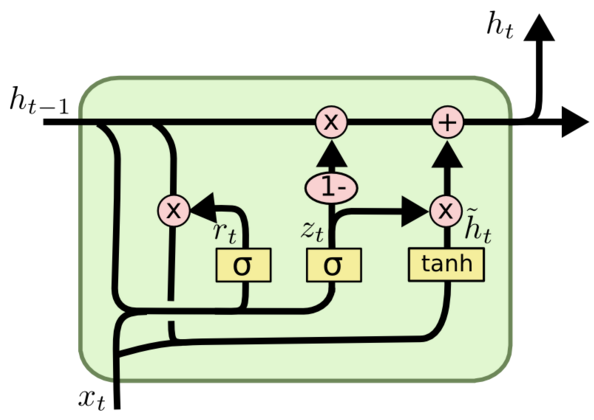
### $$update\_gate = \sigma(W_u\cdot[h{_t}{_-}{_1},x_t] + b_u)$$
### $$reset\_gate = \sigma(W_r\cdot[h{_t}{_-}{_1},x_t] + b_u)$$
### $$  \hbar_t = tanh(W\cdot[r{_t}*h{_t}{_-}{_1},x_t] + b_z)$$
### $$ h_t = (1-z_t)*h{_t}{_-}{_1} + z_t*\hbar_t $$


### For character level training, we have to encode the characters into Ascii first and then convert to One-Hot vectors before the neuron cells can handle

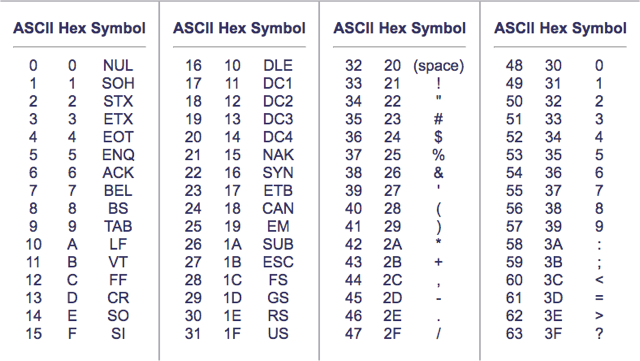
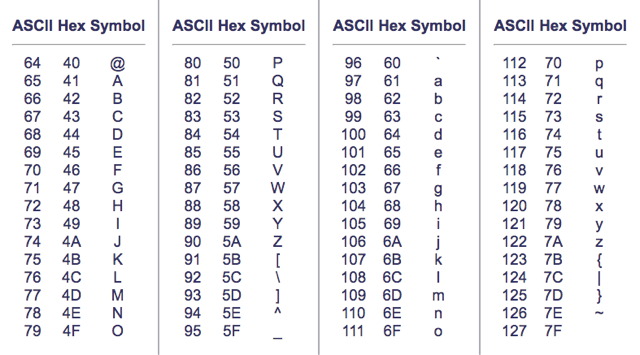

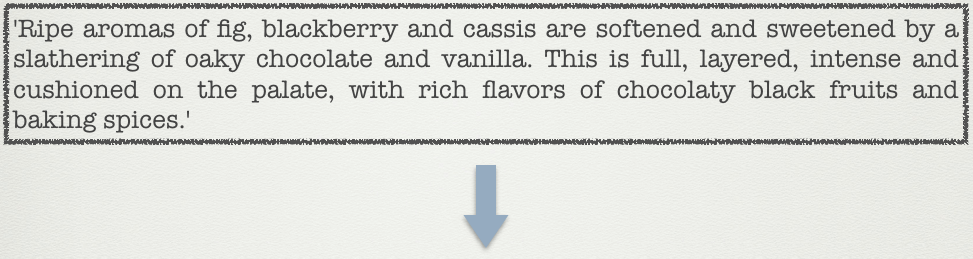

### Break up the string of text into individual characters
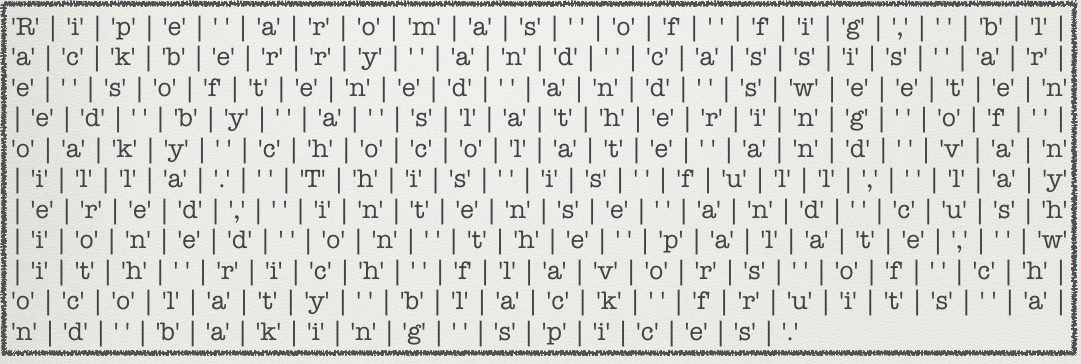

### Encode each character in Ascii code:

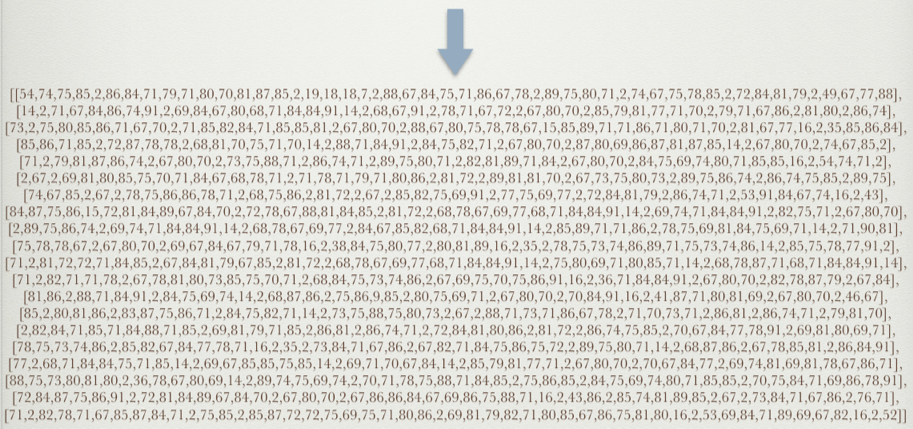

### One-Hot vectorize each Ascii encoded character:
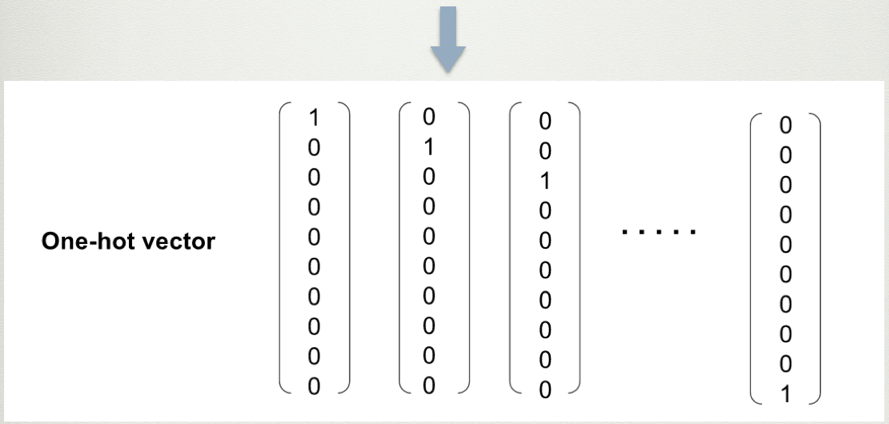

### Each RNN unit takes in a One-Hot vector representing a character as input, concatenates with the previous state $H{_t}{_-}{_1}$, goes through a series of computations by the reset and update gates and generates an output state. This RNN unfolds over the length of each sequence, taking in one character at a time, and at the end of each sequence, it predicts the next character after the end of that sequence. This predicted output is subjected to softmax computation to generate a probability, and the argmax of the highest probability gives  the most likely character candidate. Accuracy is measured by the mean of cell-wise comparison between this predicted character vector with the actual label vector. 

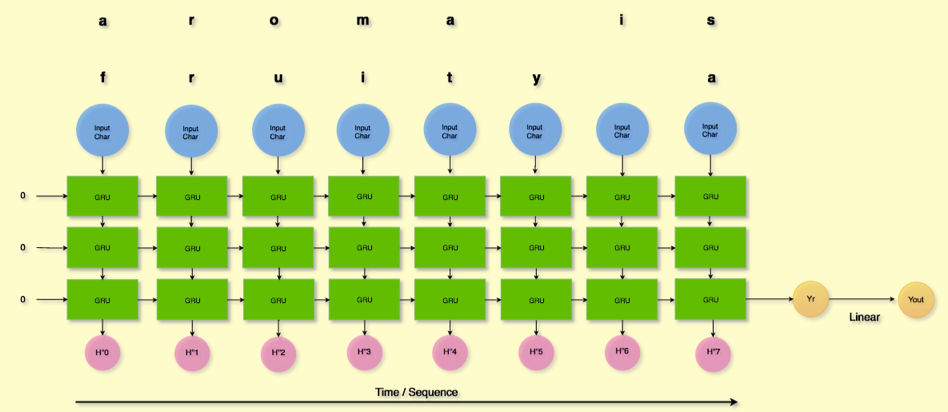
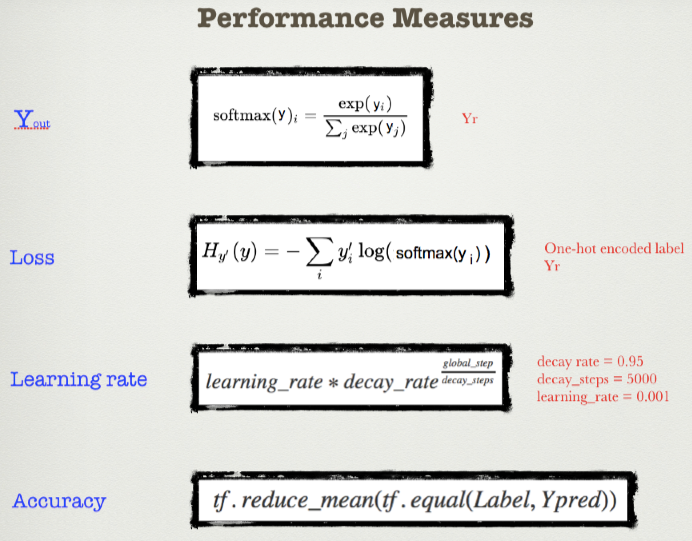

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.contrib import layers
from tensorflow.contrib import rnn  
import os
import time
import math
import pickle
import urllib
import train_textproc as txtpro
tf.set_random_seed(0)

In [2]:
pathToOutput = "./output_for_local/"

### Set our global constants 


In [6]:
%%time

seq_len = 30
batch_size=50                
num_char = txtpro.num_char   # Total num of character classes = 98
cell_size = 200              # Cell size specifies the size of the weights in the cell. Try with 200 first
num_layers = 3               # Let's try with 3 hidden layers first
learning_rate = 0.001        # input learning rate constant, decaying function implemented in the code later
keep = 0.7                   # Probability of keeping cells

url = 'wine_uncoded.pickle'

wine = pd.read_pickle(url)
ascii_text, valitext, reviewlen = txtpro.read_data(wine.description, validation=True)
# The read_data method generates two long lists of ascii encoded numbers which represent our training characters and 
# validation characters as well as a reviewlen dictionary that captures the start and end of each review text string.

### Show info on data size ###

epoch_size = len(ascii_text) // (batch_size * seq_len)
txtpro.print_data_stats(len(ascii_text), len(valitext), epoch_size)

Training text size is 32.91MB 
Validation text size is 1878.71KB 
There are 23008 batches per epoch
CPU times: user 20.2 s, sys: 978 ms, total: 21.1 s
Wall time: 21.7 s


### Create placeholders in Tensorflow, where our batches of data have to be fed thru the feed_dict 

In [5]:
learning = tf.placeholder(tf.float32, name='learning')
pkeep = tf.placeholder(tf.float32, name='pkeep')
batch = tf.placeholder(tf.int32, name='batch_size')
InputX = tf.placeholder(tf.uint8, [None, None], name='InputX')
InputY_ = tf.placeholder(tf.uint8, [None, None], name='InputY_')
Hin = tf.placeholder(tf.float32, [None, cell_size* num_layers], name='Hin')

Xoh = tf.one_hot(InputX, num_char, 1.0, 0.0)         # Convert to one-hot tensor
Yoh_ = tf.one_hot(InputY_, num_char, 1.0, 0.0)       # Convert to one-hot tensor

### Setting up the model architecture

In [6]:
# Implement Relu as activation function instead of the default tanh
cells     = [rnn.GRUCell(cell_size, activation=tf.nn.relu) for j in range(num_layers)]
dropcells = [rnn.DropoutWrapper(cell,input_keep_prob=pkeep) for cell in cells]
multicell = rnn.MultiRNNCell(dropcells, state_is_tuple=False)
multicell = rnn.DropoutWrapper(multicell, output_keep_prob=pkeep)

# Dynamic RNN will unroll our Multicell unit over the seq_len specified
Yr, H = tf.nn.dynamic_rnn(multicell, Xoh, dtype=tf.float32, initial_state=Hin) # Yr: [ batch_size, seq_len, cell_size ]
H = tf.identity(H, name='H')                                                   # H:  [ batch_size, cell_size*num_layers ] 
                                                                               # this is the last state in the sequence

Yflat = tf.reshape(Yr, [-1, cell_size])                                       # [ batch_size x seq_len, cell_size ]
Ylogits = layers.linear(Yflat, num_char)                                      # [ batch_size x seq_len, num_char ]
Yo = tf.nn.softmax(Ylogits, name='Yo')                                        # [ batch_size x seq_len, num_char ]
Y = tf.argmax(Yo, 1)                                                          # [ batch_size x seq_len ]
Y = tf.reshape(Y, [batch, -1], name="Y")                                      # [ batch_size, seq_len ]

## Set up our loss function as softmax with cross-entropy and accuracy function as mean of cell-wise logical 
## comparison

Yflat_ = tf.reshape(Yoh_, [-1, num_char])                                     # [ batch_size x seq_len, num_char ]
loss = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Yflat_) # [ batch_size x seq_len ]
loss = tf.reshape(loss, [batch, -1])                                          # [ batch_size, seq_len ]
seqloss = tf.reduce_mean(loss, 1)
batchloss = tf.reduce_mean(seqloss)
accuracy = tf.reduce_mean(tf.cast(tf.equal(InputY_, tf.cast(Y, tf.uint8)), tf.float32))

## Set up Adam Optimizer for our backpropagation training step to minimize our loss function. We will use a decaying
## learning rate

global_step = tf.Variable(1, trainable=False)
lrn = tf.train.exponential_decay(learning, global_step,5000, 0.97, staircase=True)      # decaying learning rate
train_step = tf.train.AdamOptimizer(lrn).minimize(loss,global_step=global_step)

### Save all the info to summary, to be analysed in Tensorboard later 

In [7]:
loss_summary = tf.summary.scalar("batch_loss", batchloss)
acc_summary = tf.summary.scalar("batch_accuracy", accuracy)
learning_rate_summary = tf.summary.scalar("learning_rate", lrn)
summaries = tf.summary.merge([loss_summary, acc_summary,learning_rate_summary])


### Create Tensorflow session. Both training and validation data are saved so we can visualize them in Tensorboard. ###

timestamp = str(math.trunc(time.time()))
sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True,log_device_placement=True))
summary_writer = tf.summary.FileWriter(pathToOutput + timestamp + "-training",sess.graph)
vali_writer = tf.summary.FileWriter(pathToOutput + timestamp + "-validation",sess.graph)

In [10]:
### Create saver object to save models to a directory named 'checkpoints'. Only the last 5 checkpoints are kept.                                                    ###

if not os.path.exists("checkpoints"):
    os.mkdir("checkpoints")
saver = tf.train.Saver(max_to_keep=5)

### Initialize the display parameters ###
display_f = 100
_100_Batches = display_f * batch_size * seq_len


### Initialize all variables ###
instate = np.zeros([batch_size, cell_size*num_layers])  # initialize input state to 0
init = tf.global_variables_initializer()
sess.run(init)
step = 0

### Training loop with data batches, validation and generation of text. Expect up to 1 min response lag due to training on 500 batches each time before displaying stats. If faster response is desired, can reduce to training just 200 batches between displays.

In [11]:
# Loop training, validating, summary writing, and model saving over n epochs
# Sequencer function will keep yielding batches of text for each training loop

for x, y_, epoch in txtpro.sequencer(ascii_text, batch_size, seq_len, num_epochs=2):

    # Training session
    feed_our_data = {InputX: x, InputY_: y_, Hin: instate, learning: learning_rate, pkeep: keep, batch: batch_size}
    tr_step, y, outstate = sess.run([train_step, Y, H], feed_dict=feed_our_data)


    # Validate and log data every 500 batches
    if step >0 and step // 5  % _100_Batches == 0 and len(valitext) > 0:
        feed_our_data = {InputX: x, InputY_: y_, Hin: instate, learning: learning_rate, pkeep: 1.0, batch: batch_size}  
        y, l, bl, acc, smm = sess.run([Y, seqloss, batchloss, accuracy, summaries], feed_dict=feed_our_data)
        txtpro.print_learning(x, y, l, reviewlen, bl, acc, epoch_size, step, epoch)
        summary_writer.add_summary(smm, step)                                    # save training data for Tensorboard

        valid_seq_len = 1024                    # We can use a longer sequence length for validation to save time
        bsize = len(valitext) // valid_seq_len
        txtpro.print_validation_header(len(ascii_text), reviewlen)
        vali_x, vali_y, revlen = next(txtpro.sequencer(valitext, bsize, valid_seq_len, 1))  
        vali_nullstate = np.zeros([bsize, cell_size*num_layers])                # Set input state to zero
        feed_our_valdata = {InputX: vali_x, InputY_: vali_y, Hin: vali_nullstate, learning: learning_rate,
                           pkeep: 1.0, batch: bsize}                            # No dropout for validation
        ls, acc, lrn_rate, smm = sess.run([batchloss, accuracy, lrn, summaries], feed_dict=feed_our_valdata)
        print "VALIDATION STATS:           learning rate: {:.5f},        loss: {:.5f},         accuracy: {:.5f}\
                \n\n\n".format(lrn_rate,ls, acc)

        vali_writer.add_summary(smm, step)                                     # save validation data for Tensorboard


    # Generate a chunk of 1000 text using the current weights and biases (every 2000 batches)
    if step // 20 % _100_Batches == 0:
        print "\n"+"{:-^111}".format('Generating random text from current state in the model')
        ry = np.array([[txtpro.conv_fr_char(np.random.randint(98))]]) # we can use either random characters or an array of 
                                                                      # a single character as input
        rh = np.zeros([1, cell_size * num_layers])            # Set input state to zero
        gentext = []
        for k in range(1000):
            ryo, rh = sess.run([Yo, H], feed_dict={InputX: ry, pkeep: 1.0, Hin: rh, batch: 1})
            rc = txtpro.sample_from_prob(ryo, top_n=10 if epoch <= 1 else 2)
            gentext.append(chr(txtpro.conv_to_char(rc)))
            ry = np.array([[rc]])
        print ''.join([c for c in gentext])
        print "\n"+"{:-^111}\n\n\n".format('End of generation')


    # Save our models (every 5 epochs)
    if  epoch % 5 ==0 and epoch >0:
        saved_file = saver.save(sess, pathToOutput+'/checkpoints/rnn_train_' + step, global_step=step)
        print "Saved file: " + saved_file

    # Loop the state so that the last output state of the previous epoch will be used in the new epoch
    instate = outstate
    step += batch_size * seq_len


----------------------------Generating random text from current state in the model-----------------------------
tooVo {fGJJ oGdfoG
Ghk
kodG]RGfo]
kGR]k]b{kfk
UJd bddoJdbb{dmdkGhRGoGGod
okofGR]Rfffo] 
 00okb]
dkfkfRf JJodVoURRRoRkkok okVoGkGb{]GUodJ
f{doJRo{G
  o]dtf

dRfRdRb {d bofJfdbo kRG]k]UGR{UfJ
kfokkR{V{UooG]k{G]GfofdkGb ]]dRG{Rfo]oRkbffdfoR]f0 d {
bdhfkk JooURGoGddGJU{UUd U{moUaJJmmm UofGRRRd0
R
R{bb{0JVJ dJtJVJoGV ddbUooJRdJoGdo fkmbkk ddG h{G{Ud{dR Gf{od bGdb]
oRR
dbRofff df0
okJ RVdoG{dfkGRb ]G{h
dofdJoRdRbob
fR
kkbfVJR0R 
ko{]Rddf]Vf R0fRd{ 0
ofdodk odJd?ooJ?kmGmfm]JRdkk o doRUUoJdoGGoU]kJ{{U]GsGUJaU aJaoa$d$ RU{JaodR b obGd o{fk{hG]k]oG Rf{RddR 
bRR0{
o]d 
]f Rfdk
o]kG]k{b{RdoJ]oGokd{U{ Jk{hh {VVGG{{]G]fkod fo
Jd dJ?{RkbhRhUU RdoVboGVdfG
k]kUGoG ]

{
khkGhUfRUo JUG{
UGGf   d0
o{Jbfkd{d{JhG ]UhGUhfJRGoRd
GUokUdbUbm dJkmGJmdoU{od{mdo GkbGdkdGoUkRhooGohfohGhRUoG]{
okdddoJmkGdRmm{d dd ddJJbGRbJRoR0]o d]GJ{{hff]]ofJddkdRVJk{bkbG]V]]]fJdfGG
0o
]{
GkdoGGkkddkkbhdkhbhJoRGdR]] dRUb

 (epoch 0)  │ tannins and the 28 months of n │                                │ loss: 2.97947
 (epoch 0)  │ mile-tisane notion and boosts  │                                │ loss: 2.81421
 (epoch 0)  │  and fresh, this well-balanced │                                │ loss: 2.98028
 (epoch 0)  │ und, full-bodied wine, voluptu │                                │ loss: 3.29284
 (epoch 0)  │ om the best Grenache (75%) and │   e                            │ loss: 3.67075
 (epoch 0)  │ ed tannins fill the mouth, and │                                │ loss: 2.75518
 (epoch 0)  │ k fruit, tobacco and black che │                                │ loss: 2.98381
 (epoch 0)  │ e rest Petite Sirah, sourced f │                                │ loss: 2.98267
 (epoch 0)  │ on the dry side, needing 2-3 y │                                │ loss: 3.14556
 (epoch 0)  │ aleo opens with a bright, almo │                                │ loss: 2.93687
 (epoch 0)  │ ne and don't drink before 2017 │              

VALIDATION STATS:           learning rate: 0.00100,        loss: 3.02081,         accuracy: 0.16739                



 (epoch 0)  │  nose of this always-excellent │ aet  an ahen ane n  ar er      │ loss: 2.75414
 (epoch 0)  │ started to show itself properl │ oen    ahrteer an     aiene    │ loss: 2.72567
 (epoch 0)  │ age well. Drink from 2017. Thi │ n  aire  aoen  aieneaa    ahen │ loss: 3.06609
 (epoch 0)  │ r make a fine wine. Oso Libre  │  aen  antrne ain   ao raone  t │ loss: 2.75576
 (epoch 0)  │ s even more going on once sipp │  arer ten  aont  an tn   aonee │ loss: 2.56524
 (epoch 0)  │ or intensity slightly off-kilt │ r an     t  aoen     an  aen   │ loss: 2.88412
 (epoch 0)  │  Dry Creek origins in the spic │ aoe aoer  an t t  an the aoene │ loss: 2.68707
 (epoch 0)  │ careful oak aging have helped  │ one  netnn an t  aene ae   r a │ loss: 2.75644
 (epoch 0)  │ cherry, creme de cassis and bl │ oe     aoere te aon  n and air │ loss: 2.36536
 (epoch 0)  │ lcome freshness. Afte

VALIDATION STATS:           learning rate: 0.00100,        loss: 2.61095,         accuracy: 0.30568                



 (epoch 0)  │ sh of saltiness. This comes ac │  ean ahne n     Thes aarer ane │ loss: 2.24349
 (epoch 0)  │  balanced Brunello. The palate │ tinend   aaitt   n The ainen   │ loss: 2.32210
 (epoch 0)  │ and made with no selected yeas │ nd aon  ainh aetth       airn  │ loss: 2.22684
 (epoch 0)  │ er than tannin, oak or alcohol │   ahe  ahnd n  and an an  r    │ loss: 2.46179
 (epoch 0)  │ e, packed with savory elements │   aine r ainh a ner  ar        │ loss: 2.21484
 (epoch 0)  │ ids. This opens with floral ar │ n   Thes an    aith araren an  │ loss: 2.09540
 (epoch 0)  │  to the finish. Definitely a w │ ahnthe arnet   Trrrnesh   anti │ loss: 2.26869
 (epoch 0)  │ hearty blend of Magliocco (a g │ irs   aaar  an aoneenn erarnto │ loss: 2.79971
 (epoch 0)  │ s. Drink now with rich foods t │   Trite aen ainh aanh arrr  ah │ loss: 2.21069
 (epoch 0)  │ this a refreshing, ea

VALIDATION STATS:           learning rate: 0.00100,        loss: 2.41674,         accuracy: 0.33057                



 (epoch 0)  │ el, this well-balanced wine co │ r  ahes aine aerende  aite aor │ loss: 2.10125
 (epoch 0)  │ nose is still shy but already  │ in  an ahene ahe aet and  n  a │ loss: 2.32083
 (epoch 0)  │ se the Cahors AOP is only red  │   ahe aoner  andean af   ain a │ loss: 2.77227
 (epoch 0)  │ on touches appear on the nose  │ n ah th   anderr an the tin  a │ loss: 2.09195
 (epoch 0)  │ berry and plum flavors end her │ er   and aeetearaner  and air  │ loss: 1.87970
 (epoch 0)  │  espresso, licorice and raspbe │ an ee   f tith  nh and ainteer │ loss: 2.36220
 (epoch 0)  │ n the baked and heavy side, bu │  the ter   and airne aone  aot │ loss: 1.99241
 (epoch 0)  │ given the frost and smoke issu │ ite  ahe aran  and ahen  an  n │ loss: 2.13083
 (epoch 0)  │ m the traditional Bordeaux var │ eahe ahen nhnn neaar   ns aene │ loss: 2.67729
 (epoch 0)  │  possess a fresh, zes

KeyboardInterrupt: 

#### <div class = "alert alert-block alert-warning"> This model takes 1 - 2 days to finish running 20 epochs, even when GPU is used. Hence I am only training it using python in Google Cloud VM instance and not Jupyter Notebook. Attached below are the results that I obtained from training in the cloud. </div>

## <div class = "alert alert-block alert-info"> 8. Results: </div>
---

### <font color = 'blue'>After 100 batches: The neural net couldn't predict anything yet.</font>
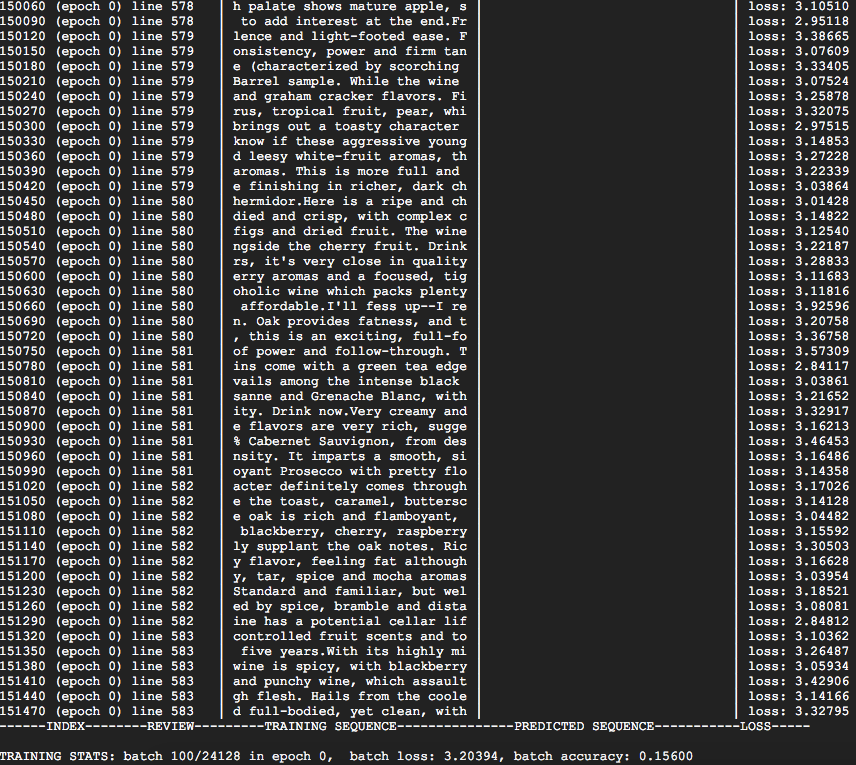
<br><br>
### <font color = 'blue'>After 500 batches: Now it starts to predict some characters</font>
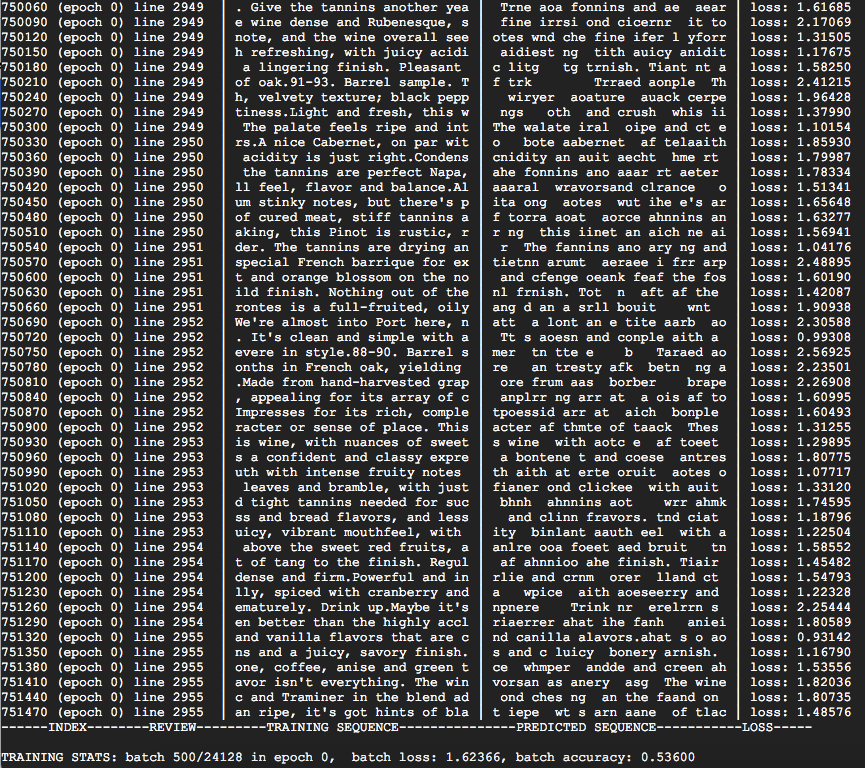

<br><br>
### <font color = 'blue'>After 2500 batches: We can see that it can start to spell some English words already</font>
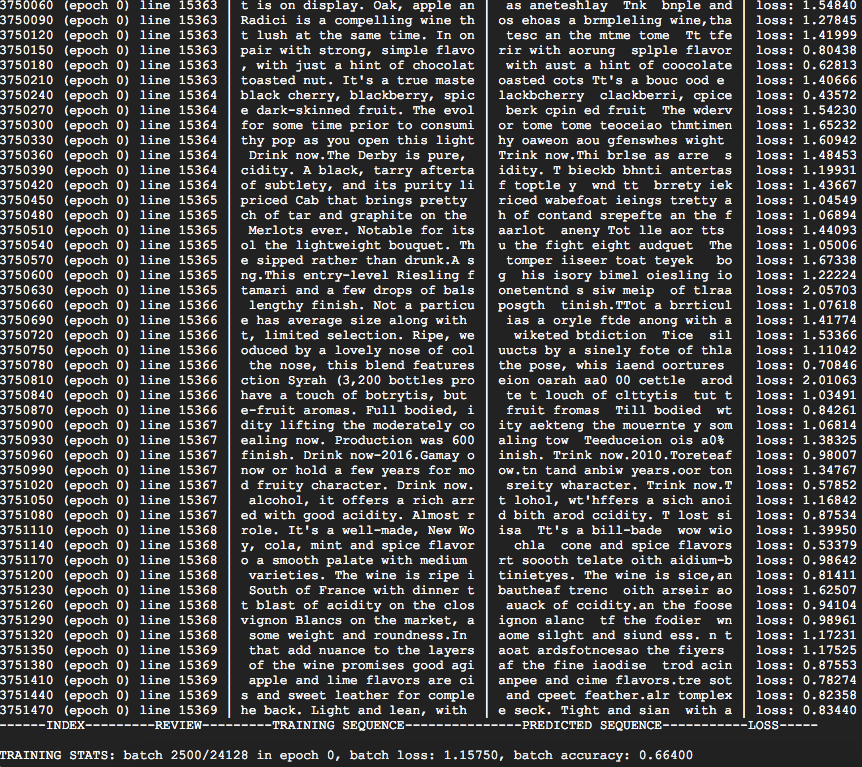

## Accuracy and Loss curves :
### Using the default tanh as activation function and cellsize 512: <font color='red'>seems to encounter exploding gradients.</font>
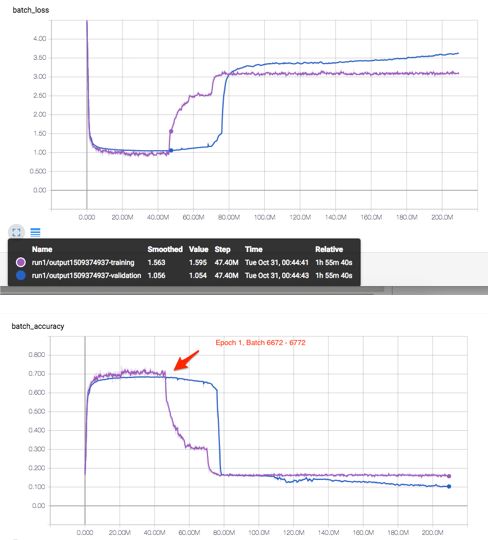
<br>
### Implement Relu as activation function to help reduce probability of exploding gradients and reduce cellsize to 250, as well as learning rate 0.0001: <font color='red'>seems to learn abit too slowly</font>
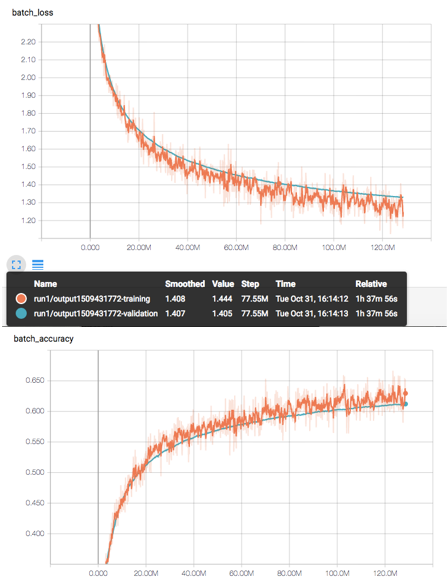
<br>
### Using Relu as activation function and cellsize 250, learning rate 0.001 starting and decaying: <font color='red'> now its seems much better and more stable</font>
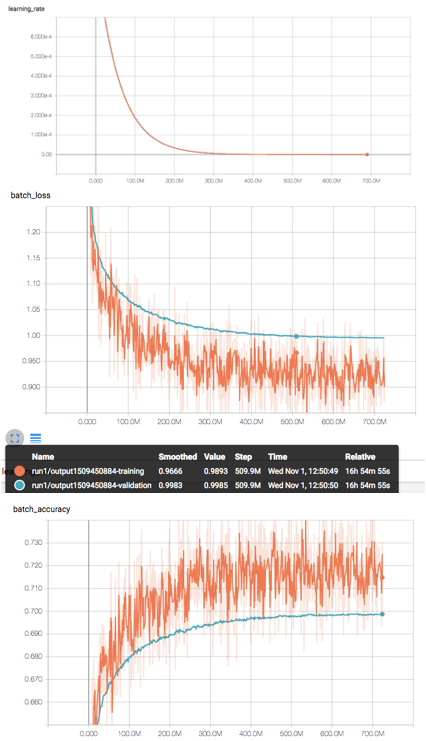

In [33]:
import tensorboard
!tensorboard --logdir=run1:./Output

Starting TensorBoard 54 at http://Bernt73:6006
(Press CTRL+C to quit)
^C


## <div class = "alert alert-block alert-info"> <font color="black">Generated text samples </font></div>

### Right at the start:
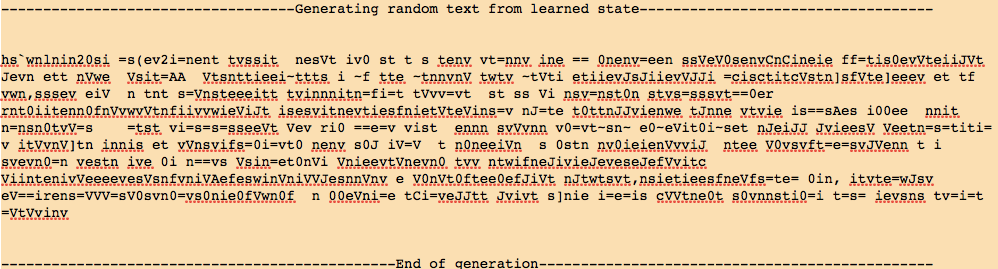
<br>
### After 4000 batches: <font color='red'> it starts to spell English words now!! </font>
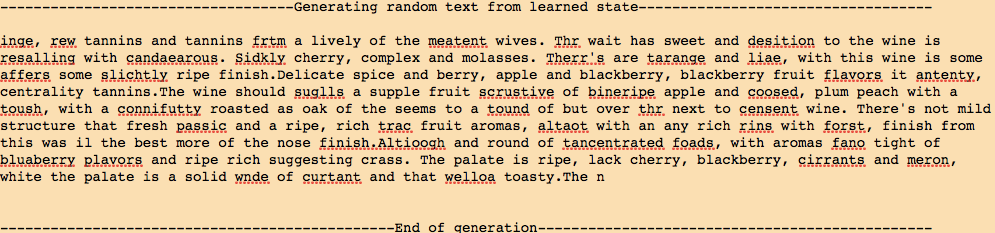
<br>
### After 1 epoch:
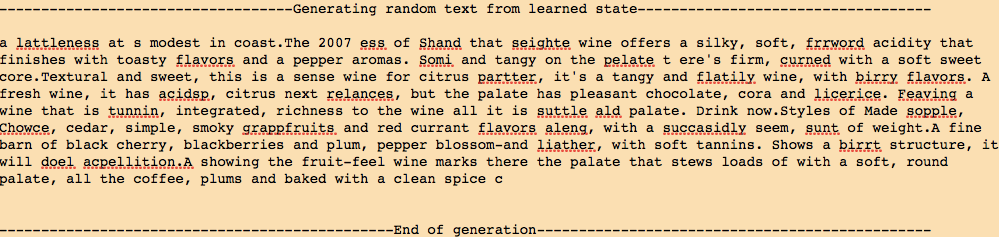
<br>
### After 5 epochs:
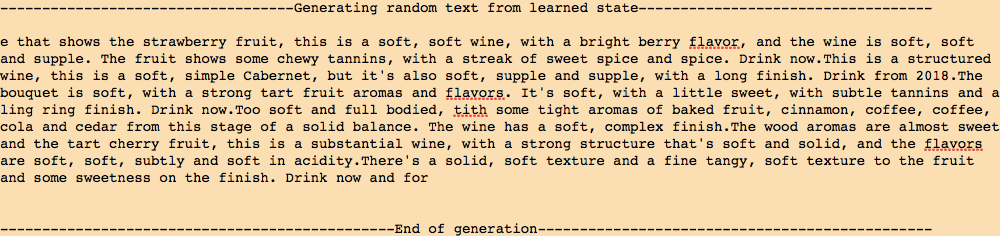

### <div class = 'alert alert-block alert-success'> <font color = 'blue'> Overall, I'm pleased to see that my model is able to spell English words properly at the end, and also understands punctuation positions. Even the sentence structure is quite complete too. While the content of the text may be a little limited, this is after all largely dependent on the quality of the text corpus and I think it's not too bad for an initial attempt. Further processing and shaping of the text reviews is required to improve the quality of the text generation for sure. </font>

## <div class = "alert alert-block alert-info"> 9. Suggested further work 
--- 
<font size = '3'> 1. Increasing the input sequence length and/or number of hidden layers to improve accuracy <br><br> 2. Using the Word2Vec model to create a word embedding layer to the RNN to generate word sequences instead of character sequences <br><br> 3. Filter out those reviews with Positive sentiment scores to let the neural net learn only 'biased', but 'attractive' text reviews. <br><br> 4. Using the RNN with word embeddings layer to try to classify the 632 varieties of wine. </font>

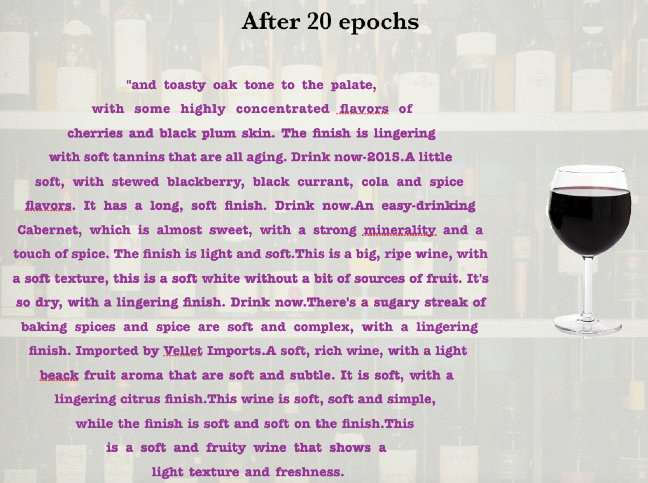

## <font color = 'red'>Finally I leave you with this sample text generated at the last epoch, hopefully it can leave you with a sweet after-taste in your mouth!!</font><br><br><br>$$ ---   END   ---$$